In [2]:
# Load libraries
import pandas as pd
from pandas_profiling import ProfileReport
# import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno

/Users/federico.gutierrez/.pyenv/versions/3.10.7/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Loading the dataset into a dataframe
df = pd.read_csv("annual-change-forest-area2.csv", low_memory=False)
dfcont = pd.read_csv("countryContinent.csv", encoding='ISO-8859-1')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 475 non-null    object 
 1   Code                   467 non-null    object 
 2   Year                   475 non-null    int64  
 3   Net forest conversion  475 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.0+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,475.0,2004.326316,9.360842,1990.0,2000.0,2010.0,2015.0,2015.0
Net forest conversion,475.0,-76931.031579,639354.379567,-7818000.0,-30260.0,0.0,3205.0,2360980.0


In [3]:
df.head(30)

,Entity,Code,Year,Net forest conversion
0,Algeria,DZA,1990,-8800.0
1,Algeria,DZA,2000,33900.0
2,Algeria,DZA,2010,7600.0
3,Algeria,DZA,2015,-1400.0
4,Argentina,ARG,1990,-182600.0
5,Argentina,ARG,2000,-316400.0
6,Argentina,ARG,2010,-223400.0
7,Argentina,ARG,2015,-104800.0
8,Aruba,ABW,1990,0.0
9,Aruba,ABW,2000,0.0


In [4]:
df['new_column'] = 'value 1'

In [9]:
dfcont.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [11]:
dfMerged = pd.merge(df, dfcont, left_on="Entity", right_on="country", how="left")
dfMerged.head()

,Entity,Code,Year,Net forest conversion,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Algeria,DZA,1990,-8800.0,Algeria,DZ,DZA,12.0,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
1,Algeria,DZA,2000,33900.0,Algeria,DZ,DZA,12.0,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
2,Algeria,DZA,2010,7600.0,Algeria,DZ,DZA,12.0,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
3,Algeria,DZA,2015,-1400.0,Algeria,DZ,DZA,12.0,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,Argentina,ARG,1990,-182600.0,Argentina,AR,ARG,32.0,ISO 3166-2:AR,Americas,South America,19.0,5.0


<AxesSubplot:>

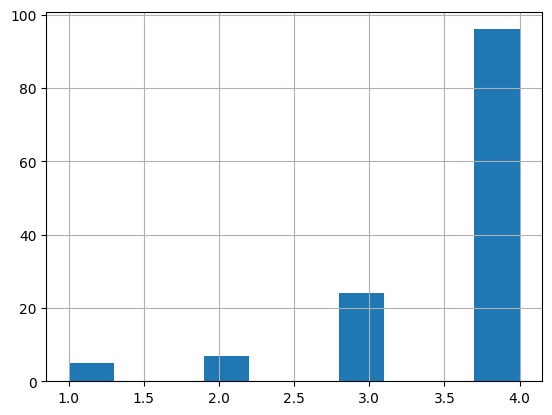

In [4]:
df["Entity"].value_counts().hist()


<AxesSubplot:xlabel='Year', ylabel='Net forest conversion'>

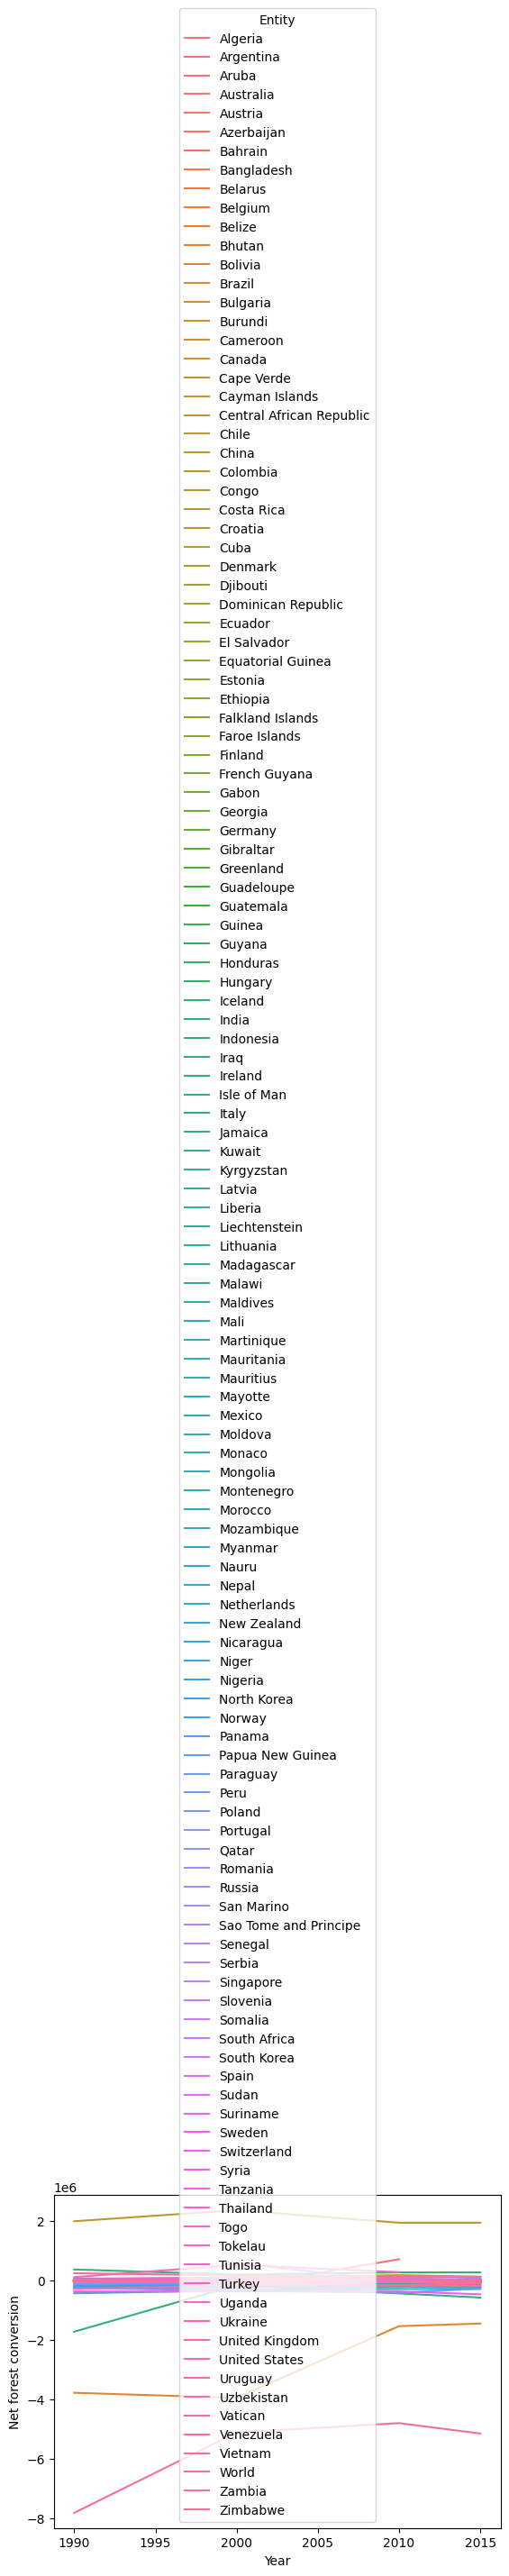

In [18]:
sns.lineplot(x='Year', y='Net forest conversion', hue='Entity', data=df)

/Users/federico.gutierrez/.pyenv/versions/3.10.7/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


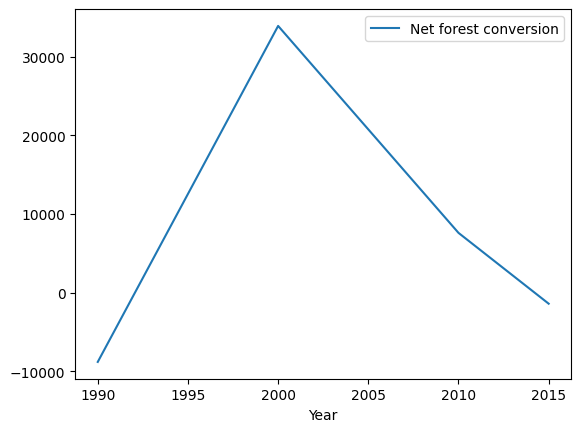

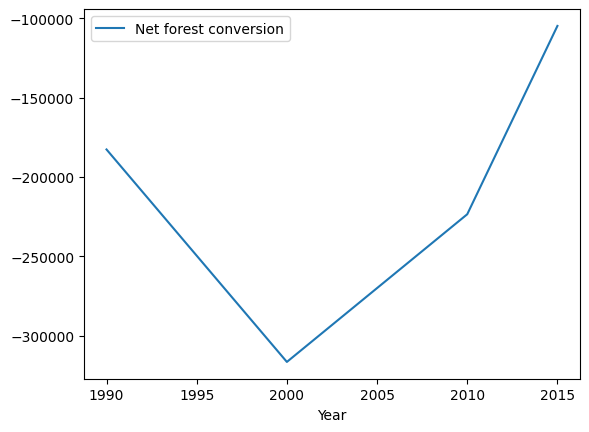

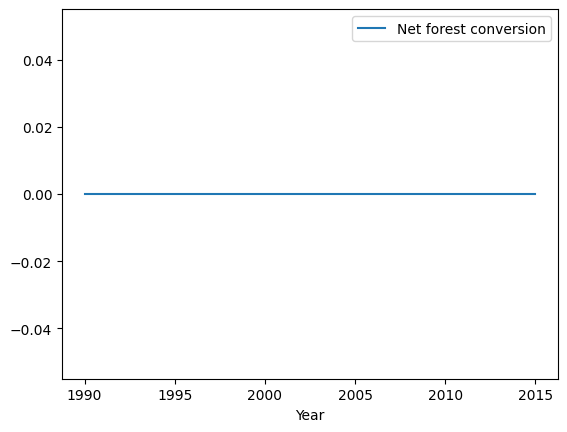

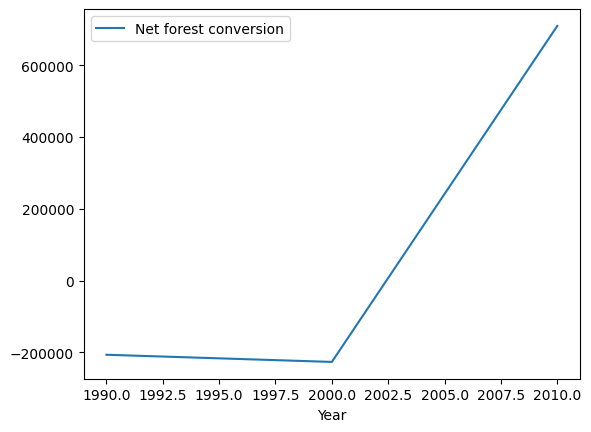

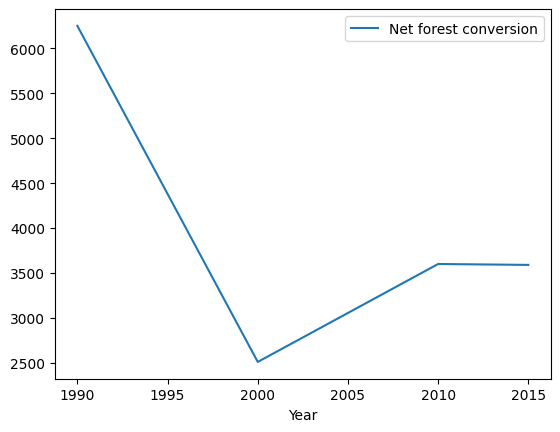

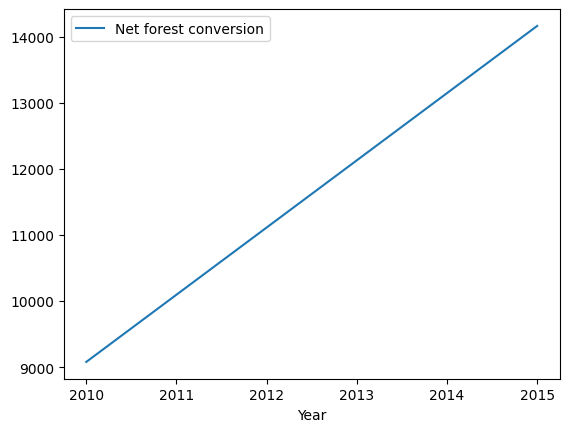

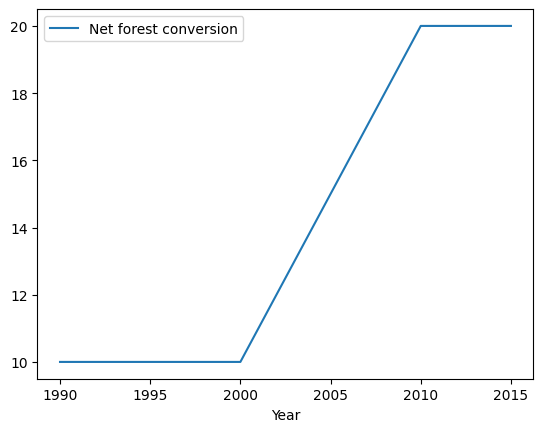

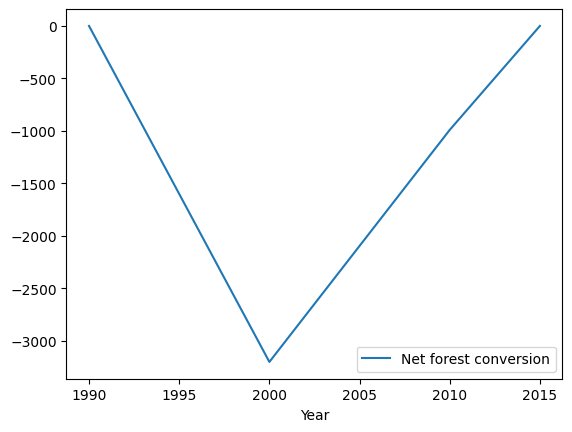

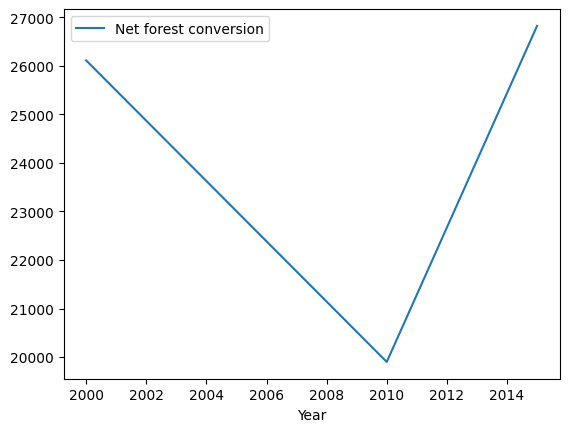

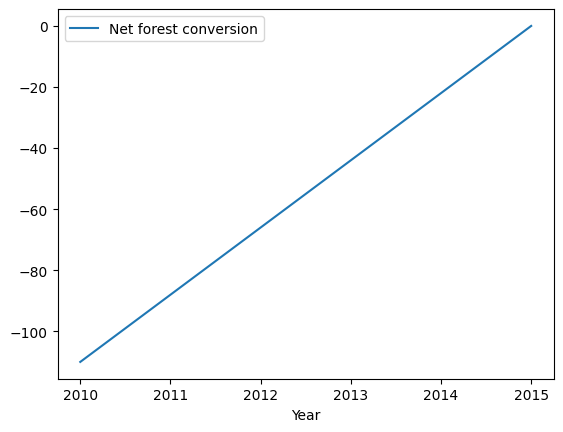

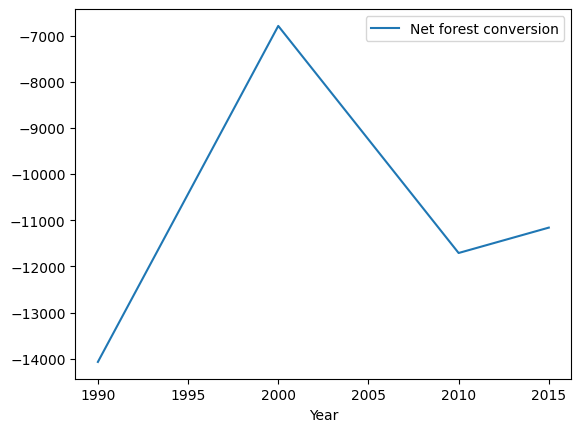

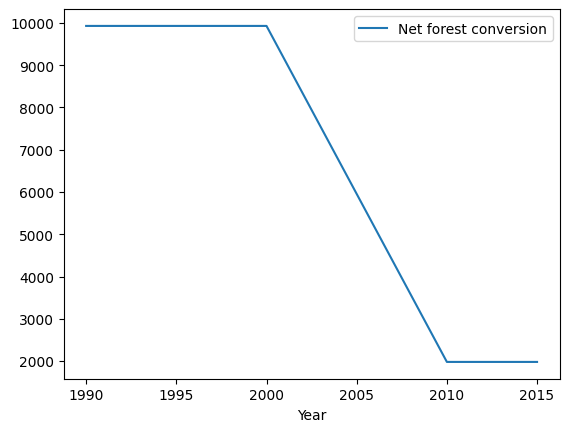

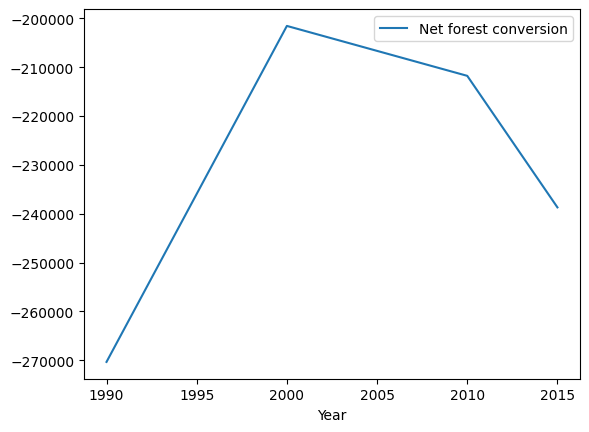

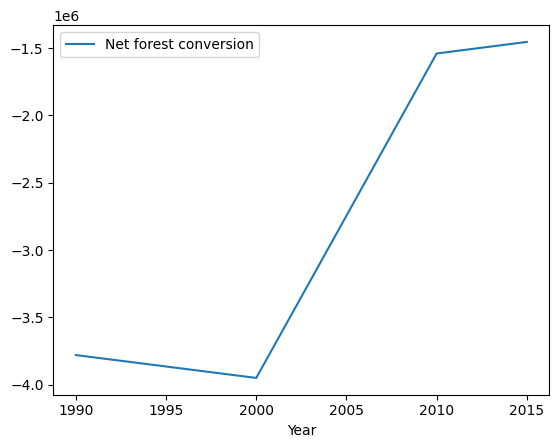

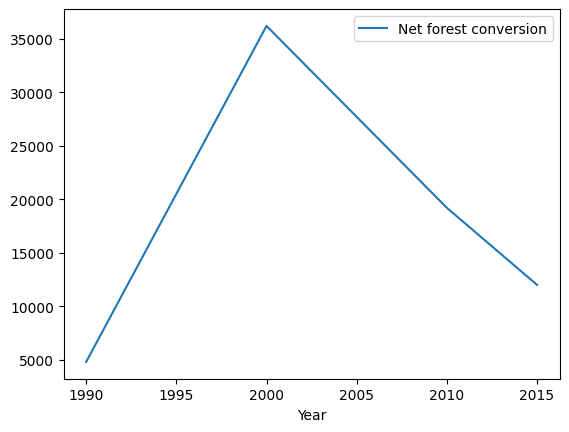

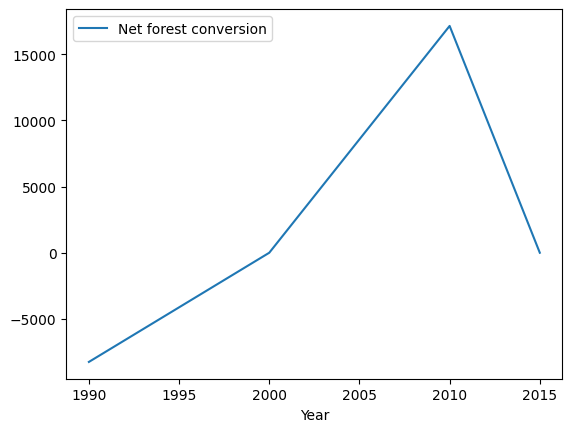

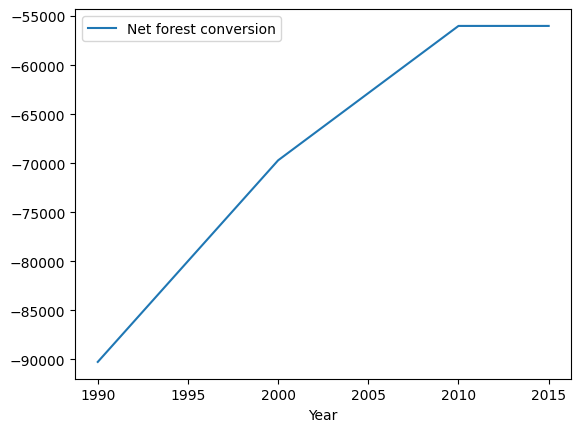

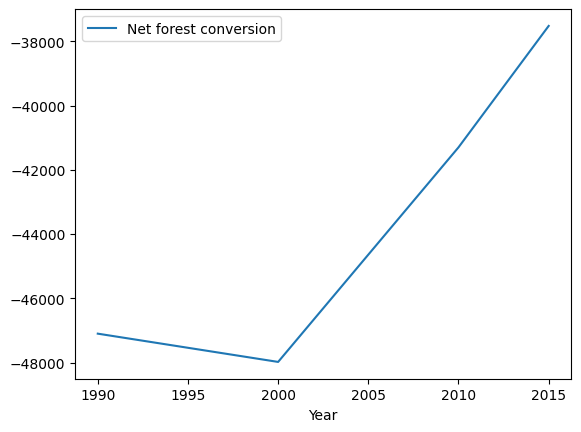

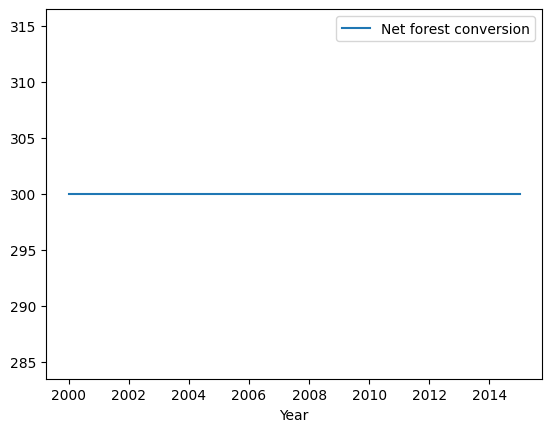

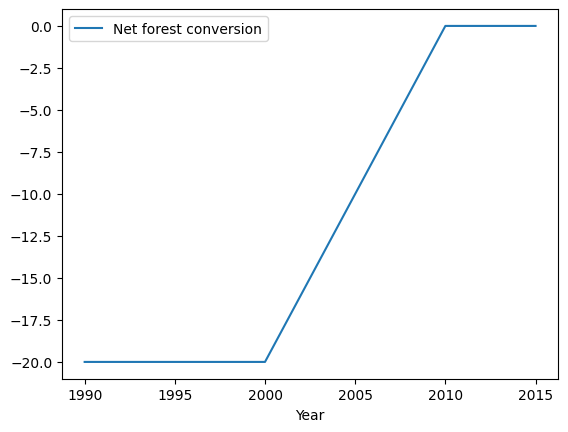

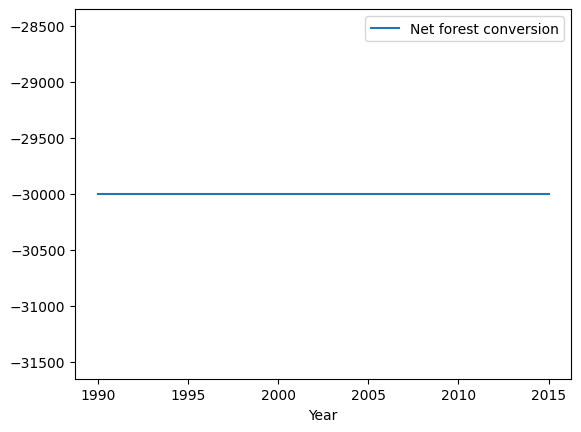

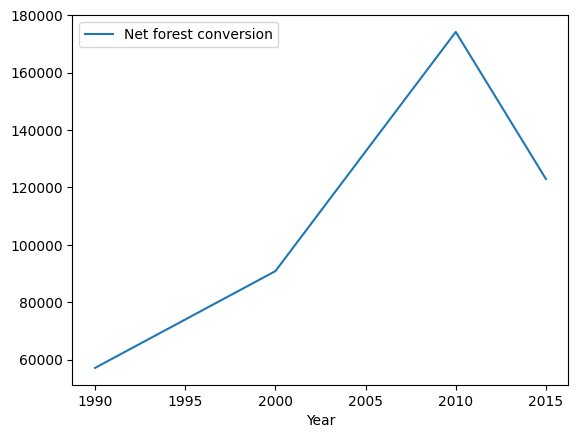

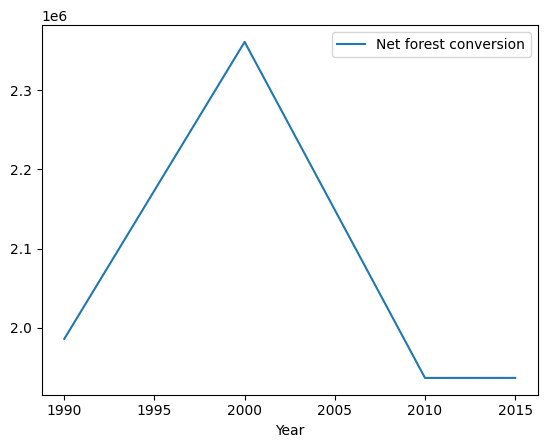

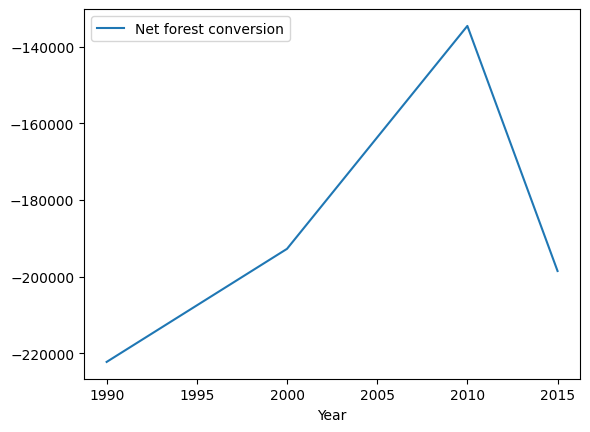

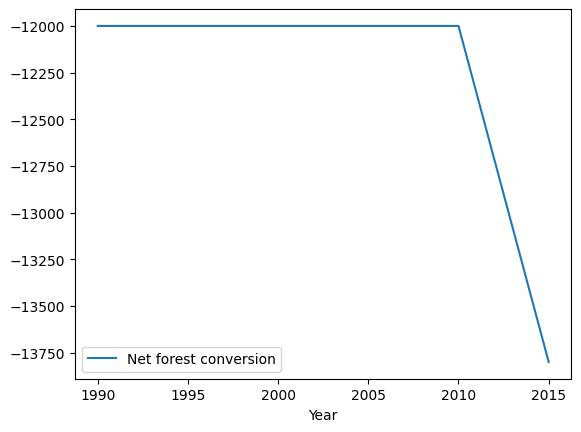

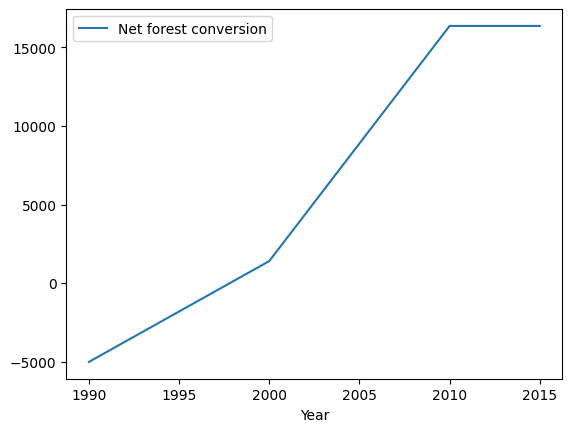

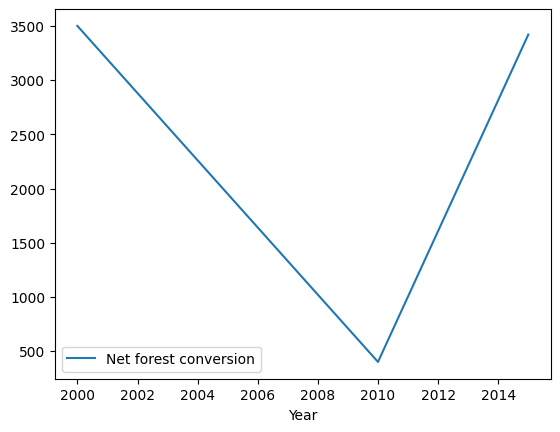

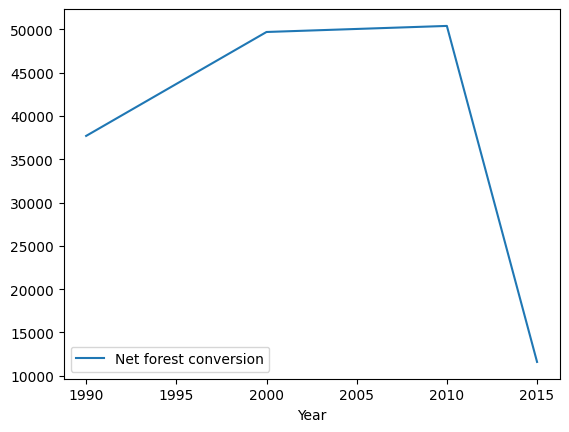

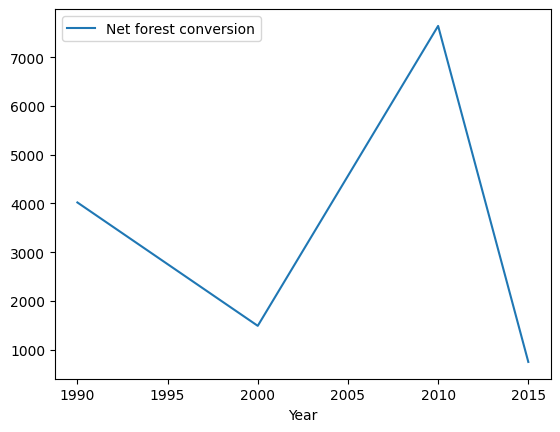

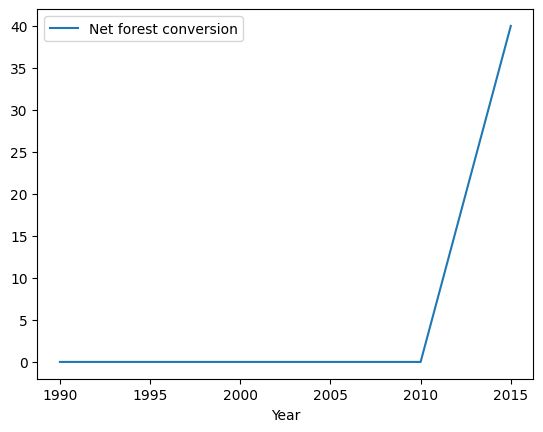

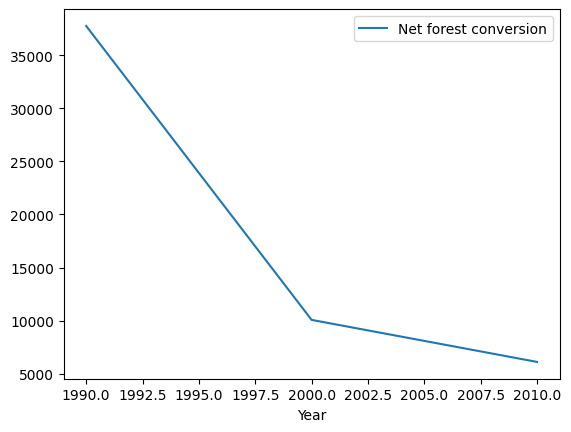

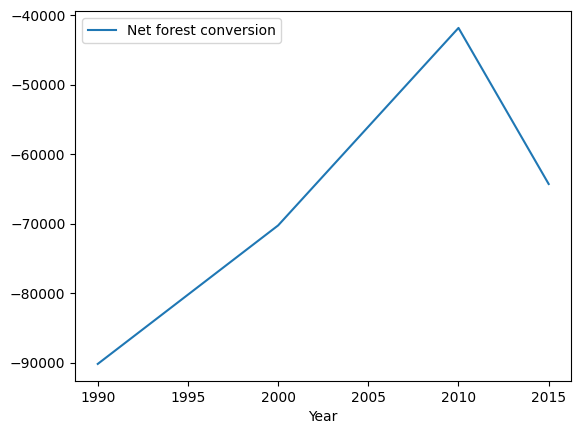

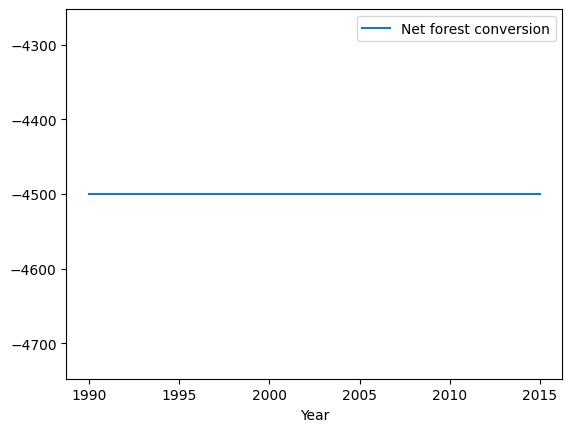

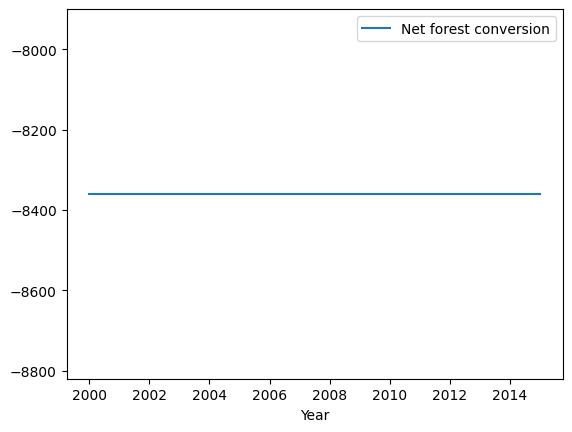

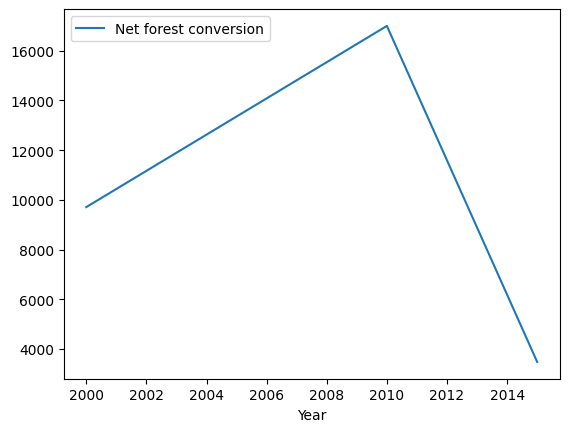

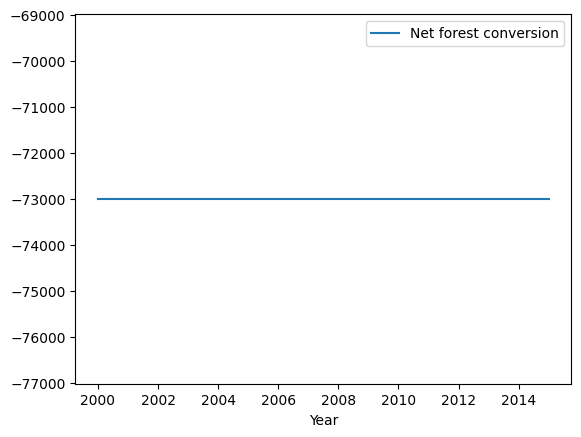

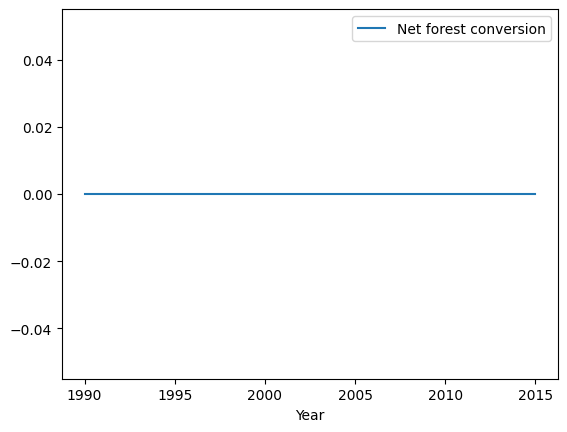

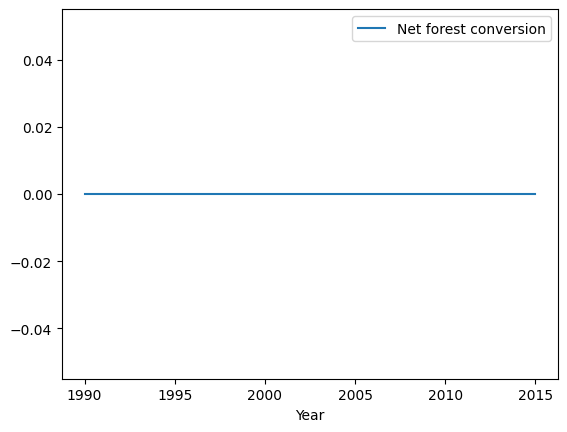

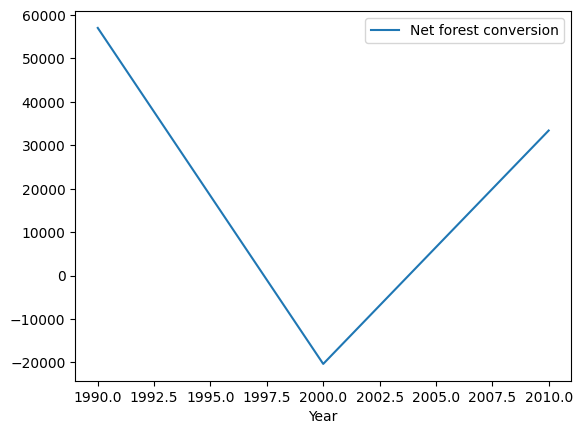

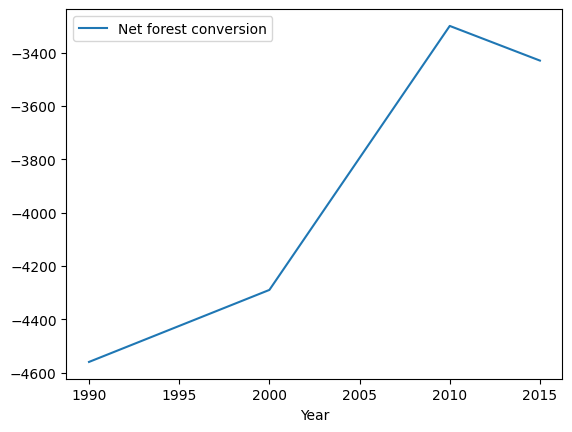

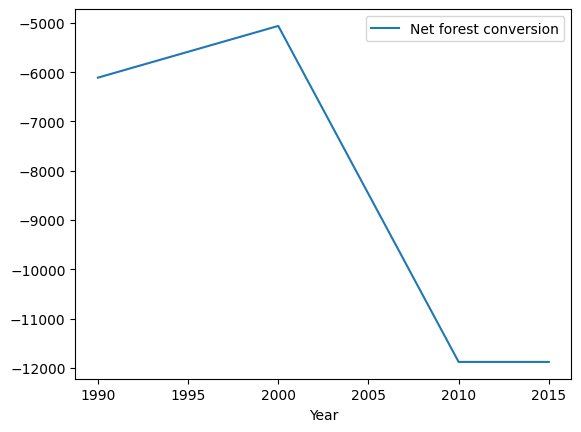

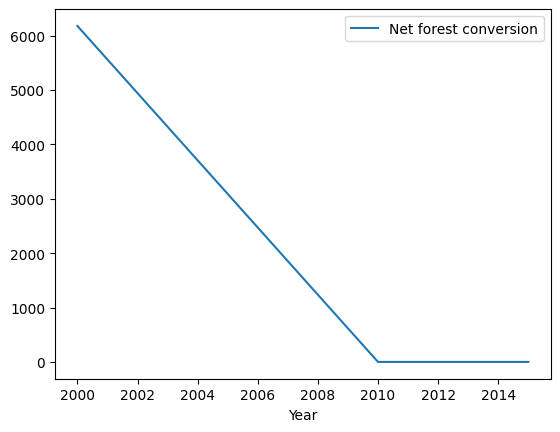

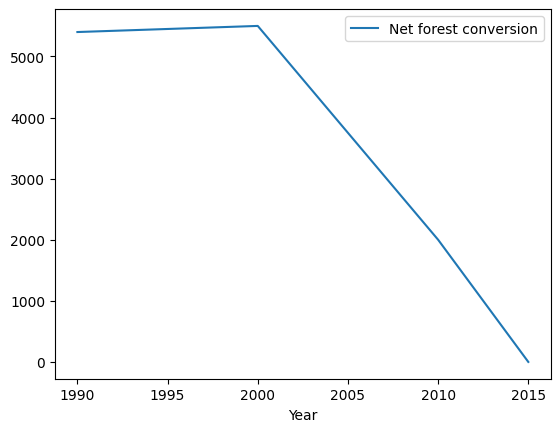

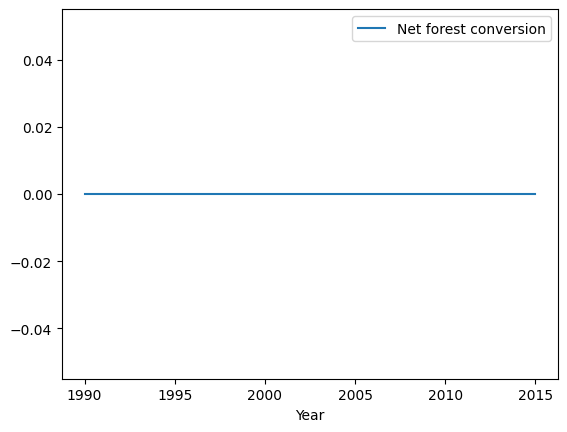

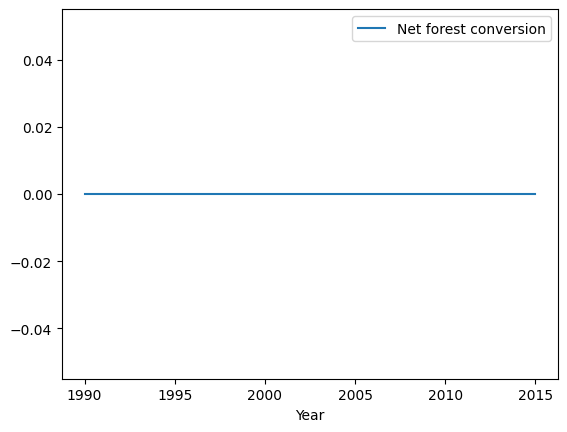

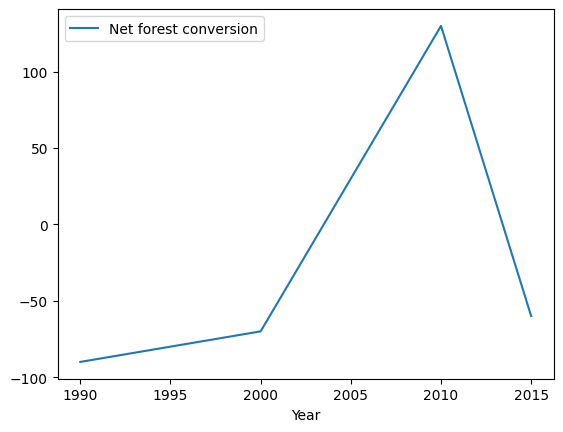

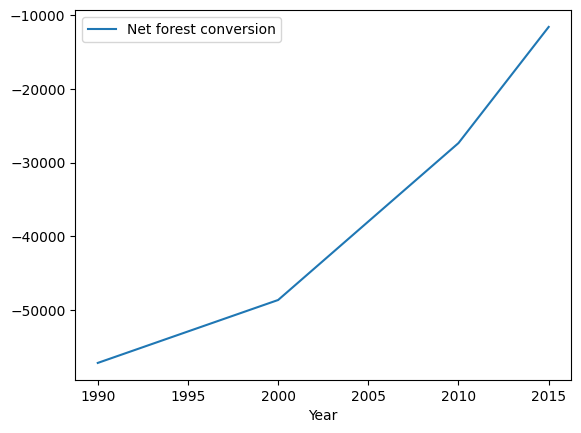

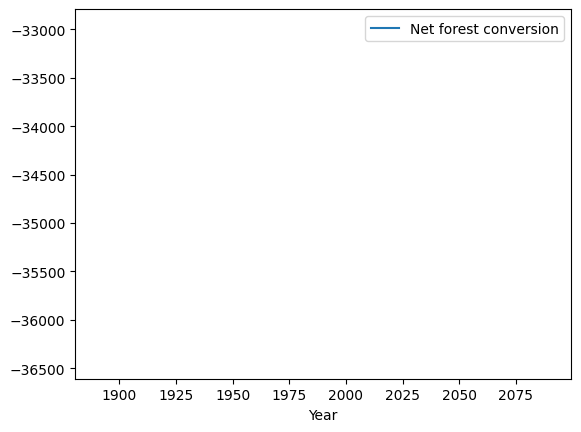

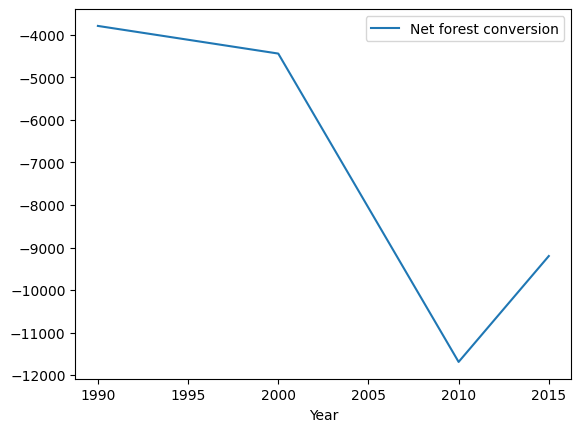

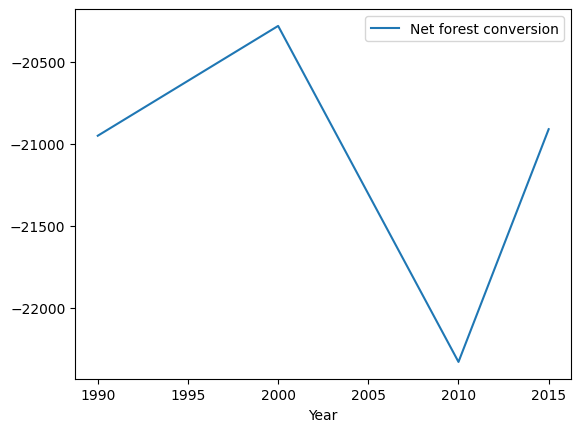

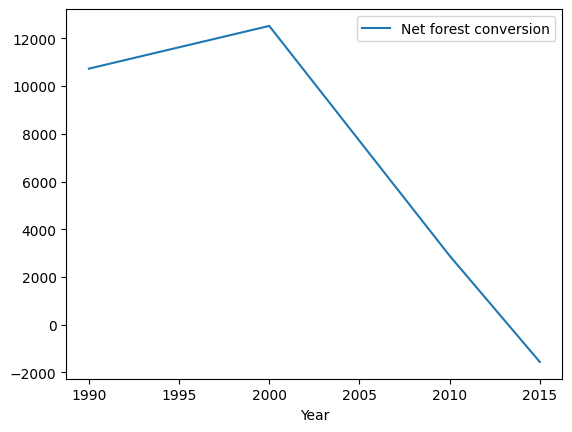

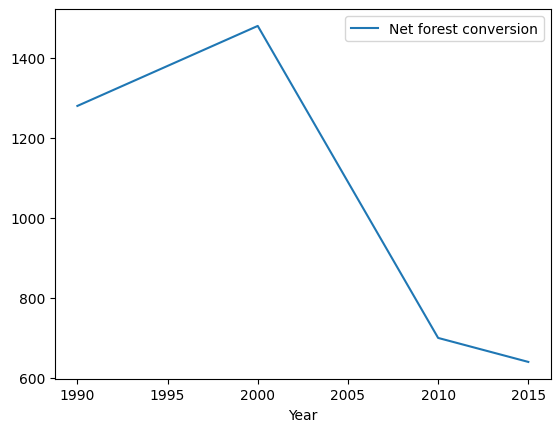

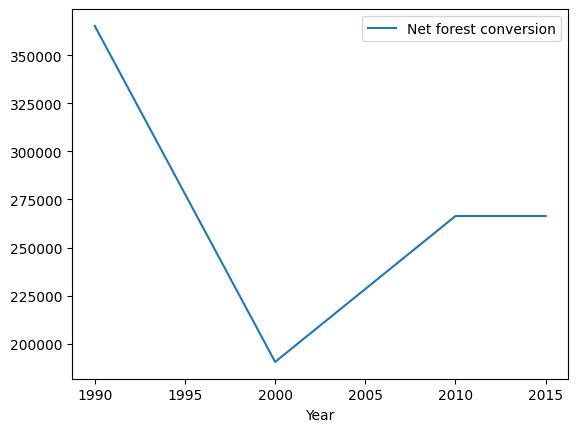

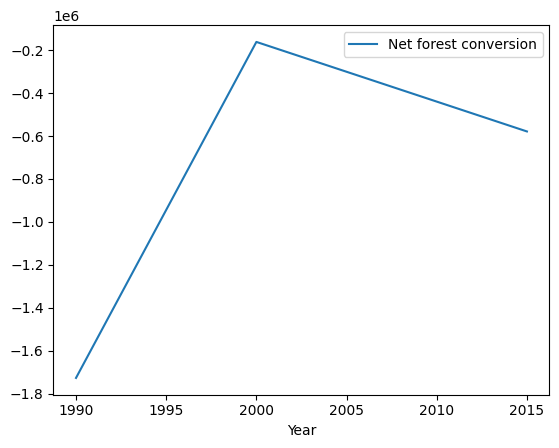

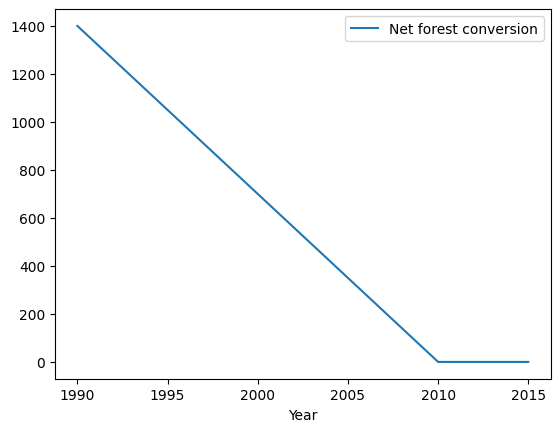

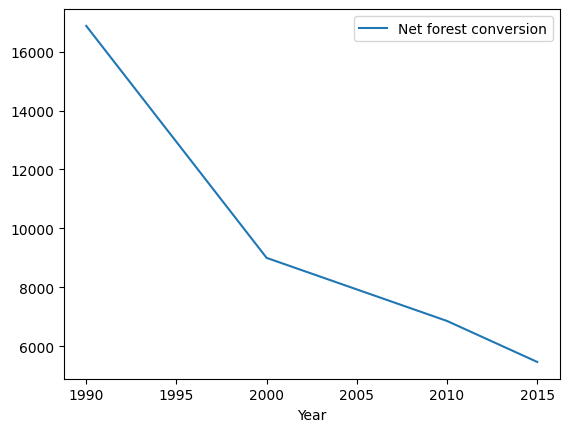

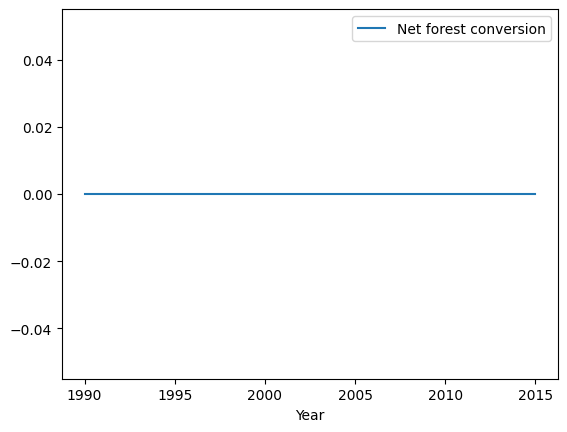

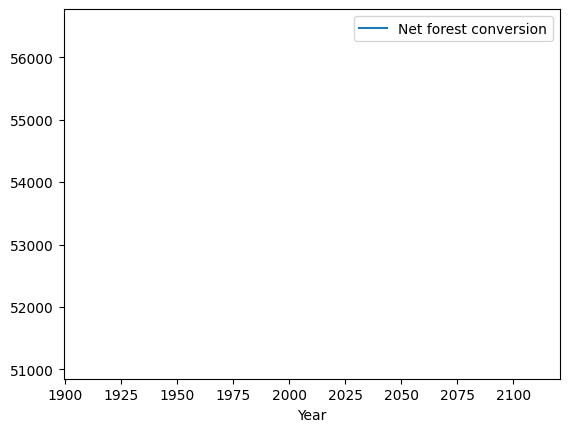

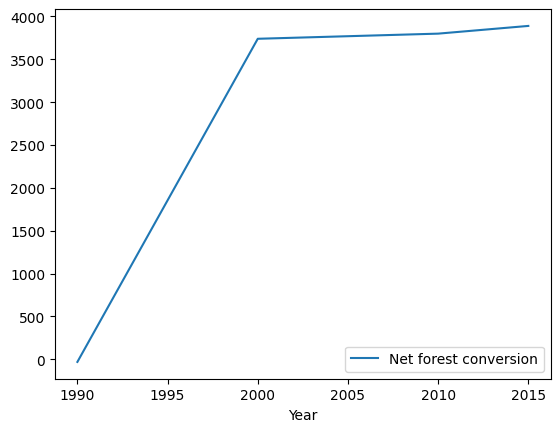

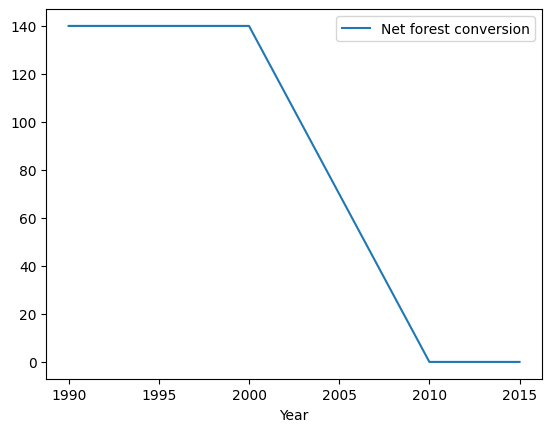

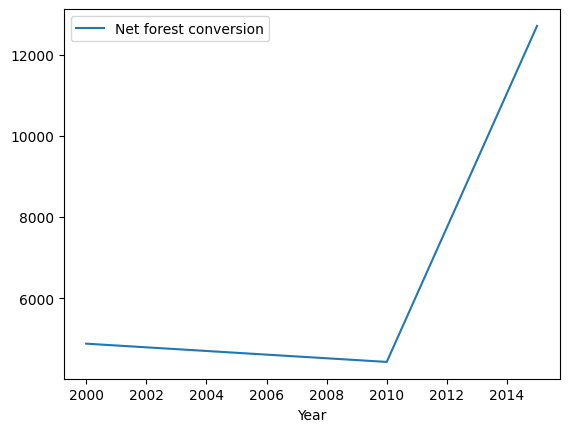

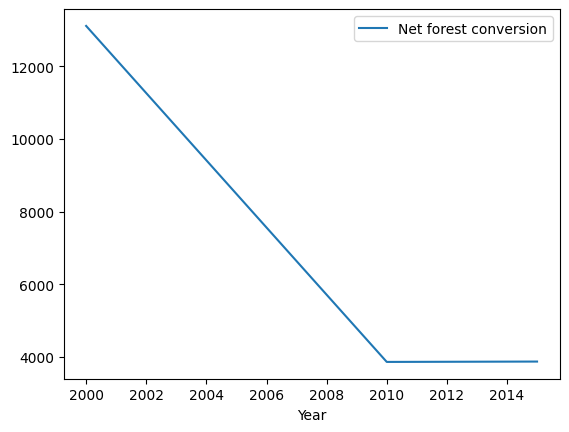

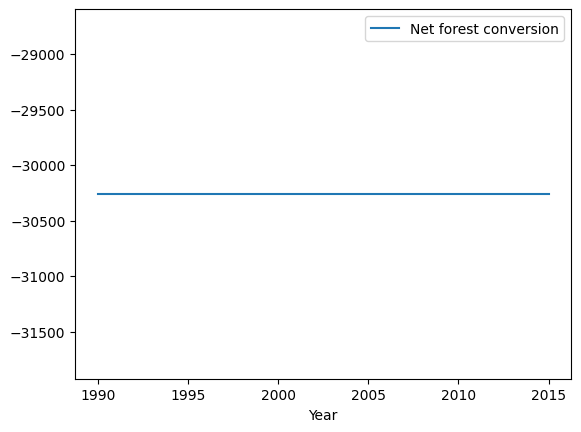

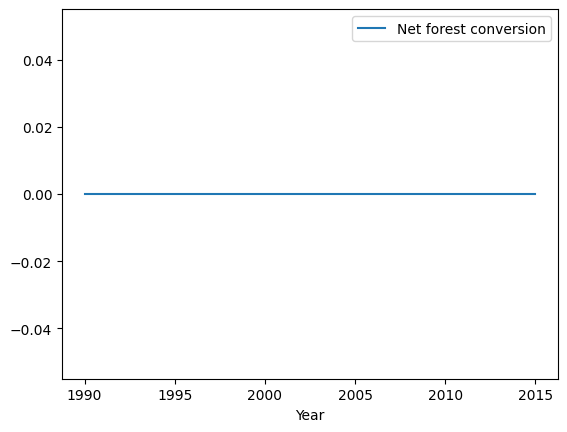

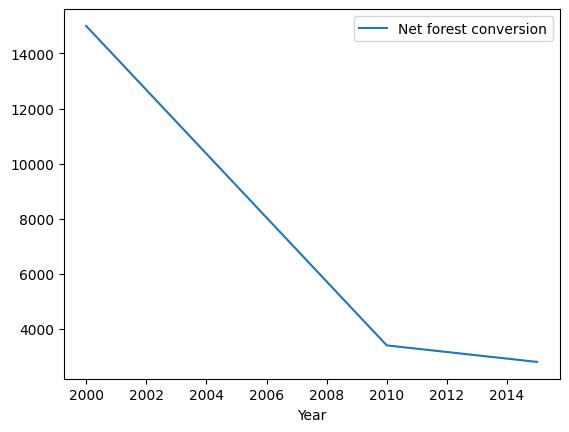

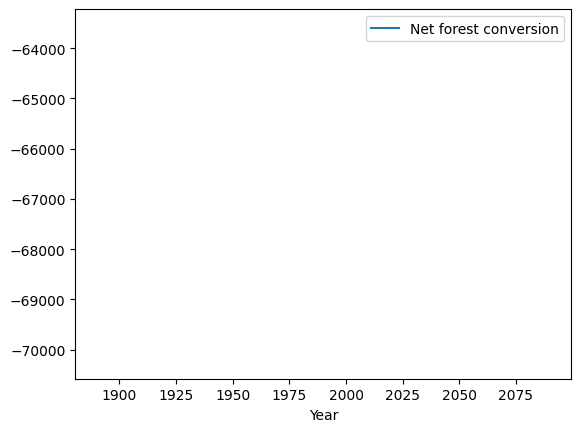

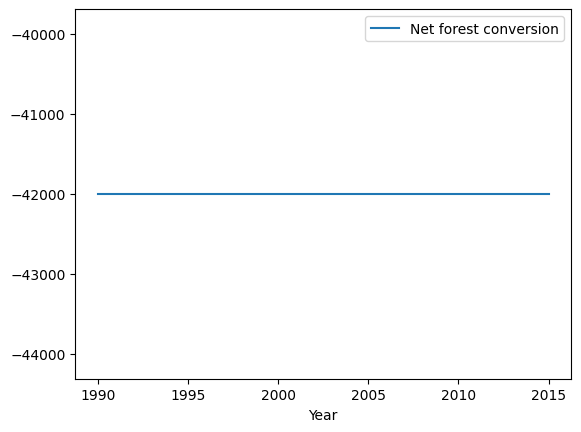

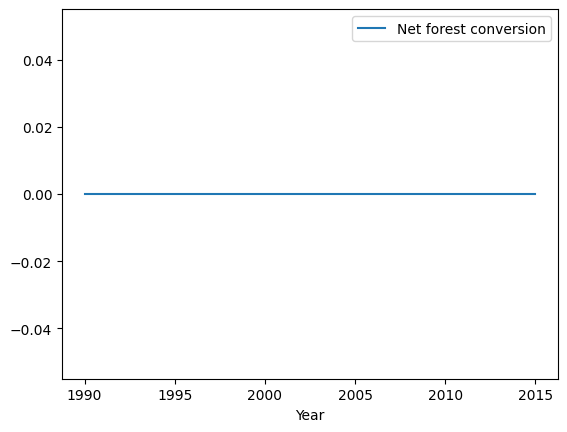

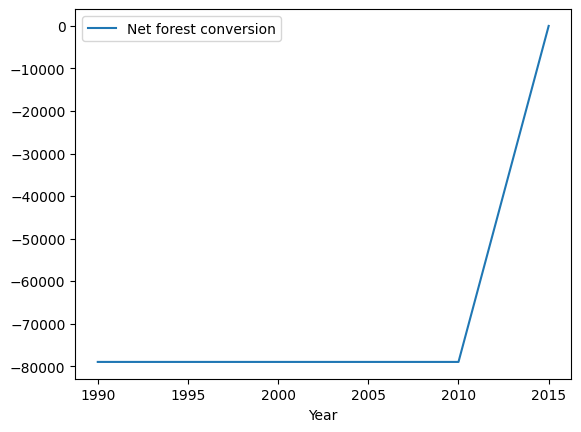

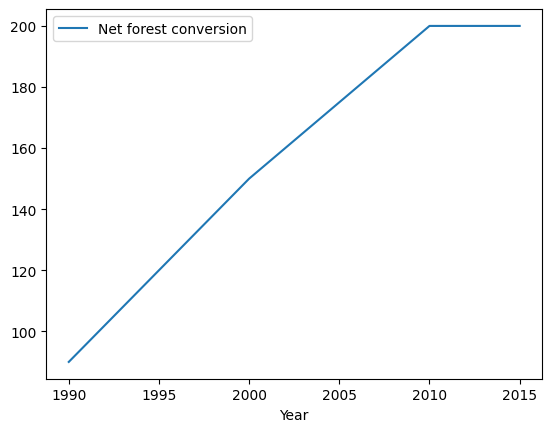

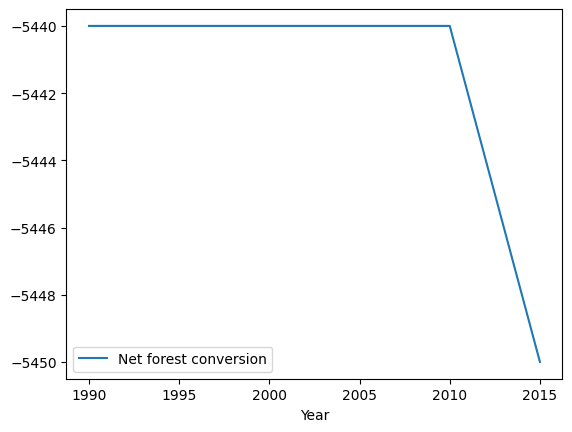

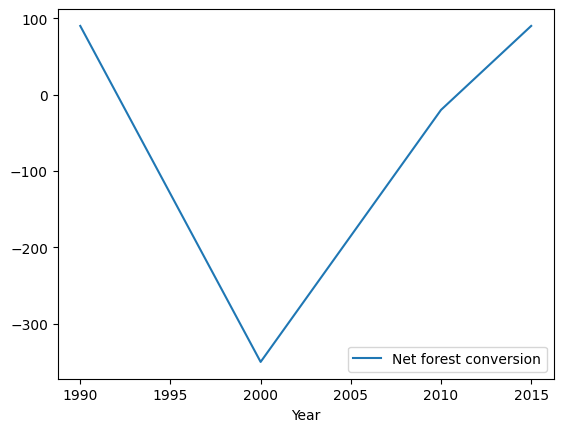

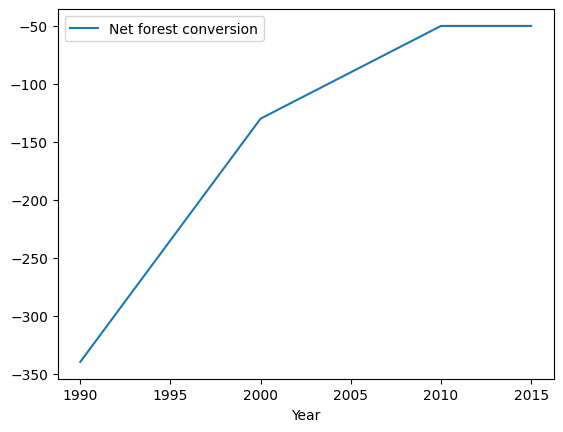

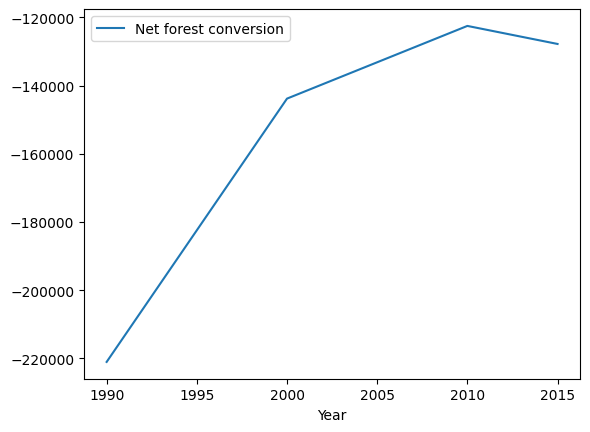

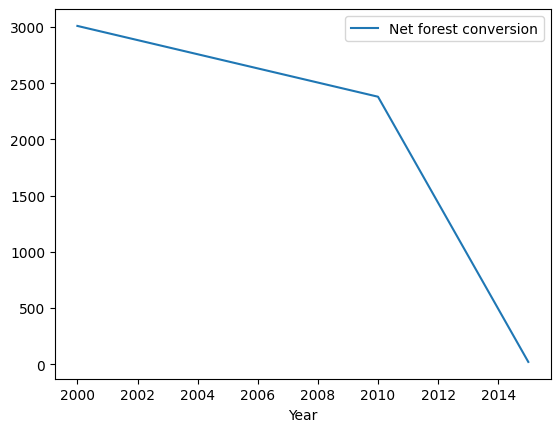

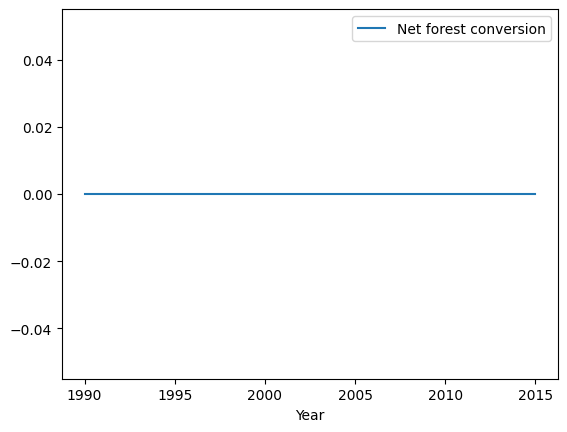

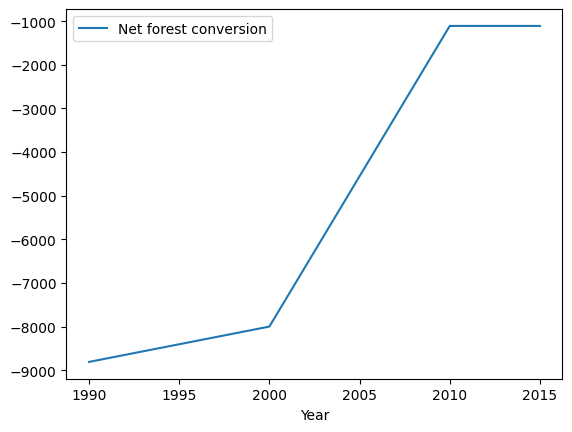

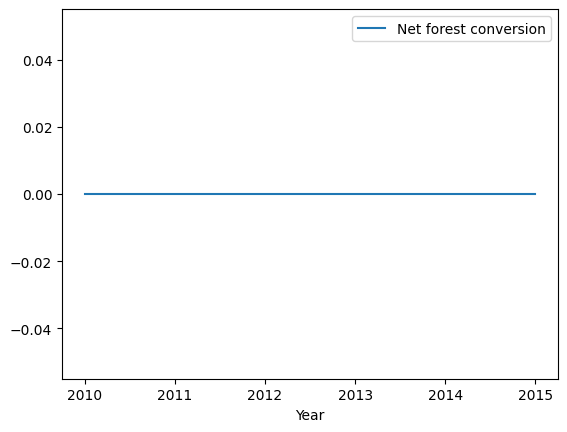

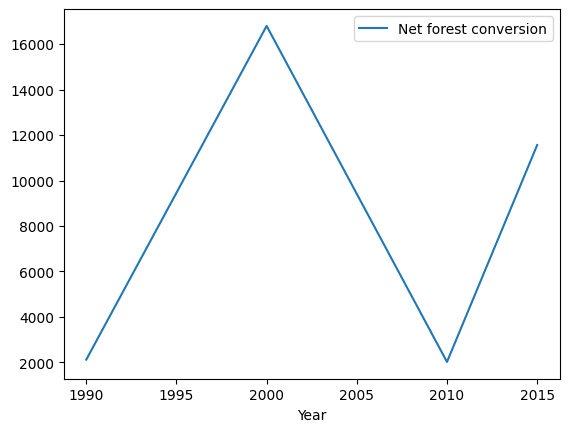

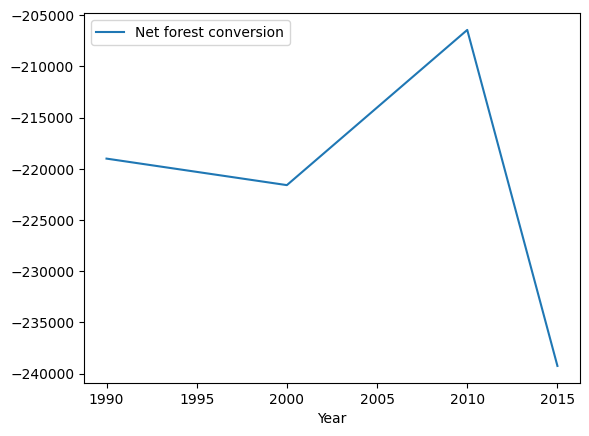

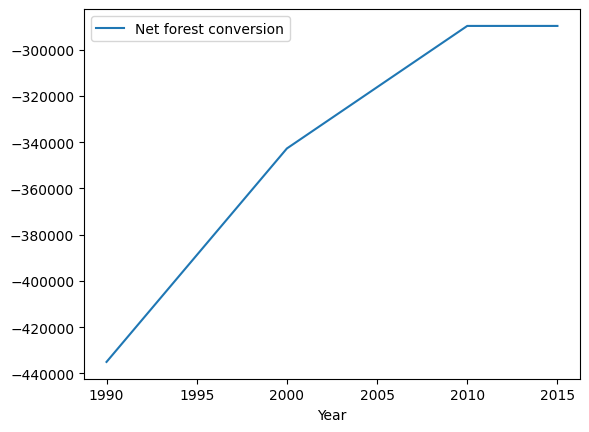

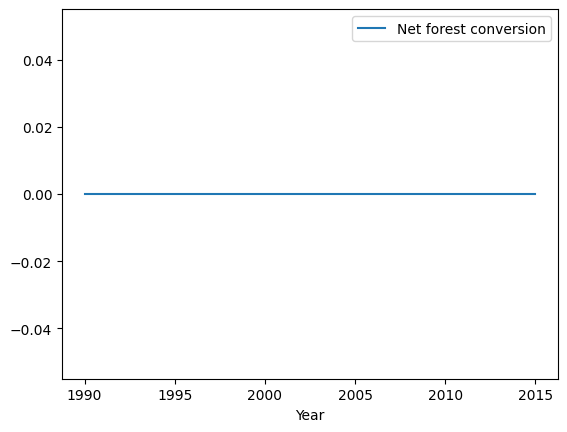

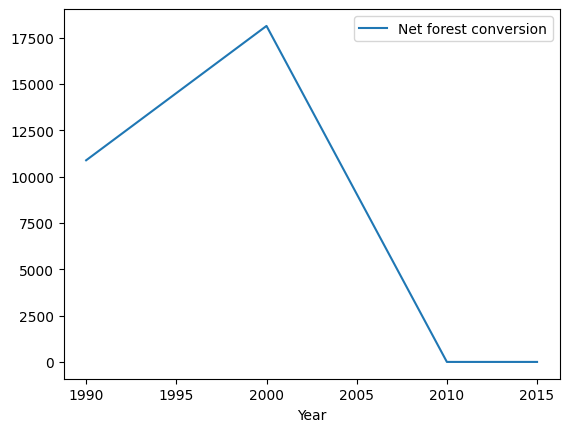

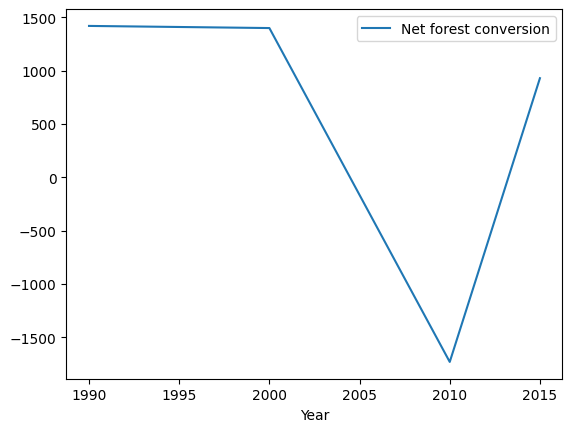

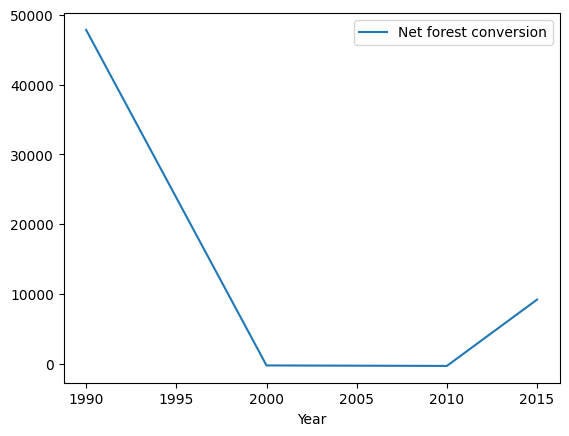

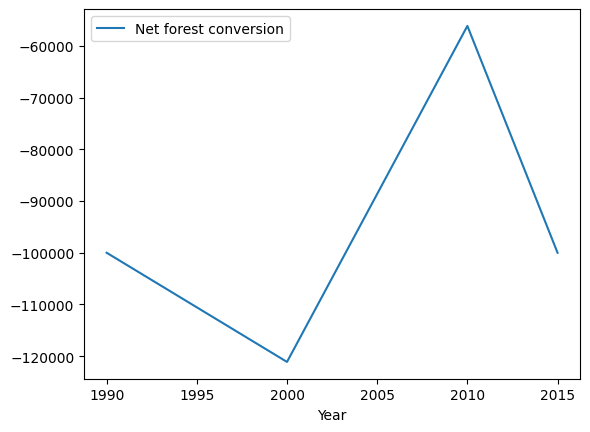

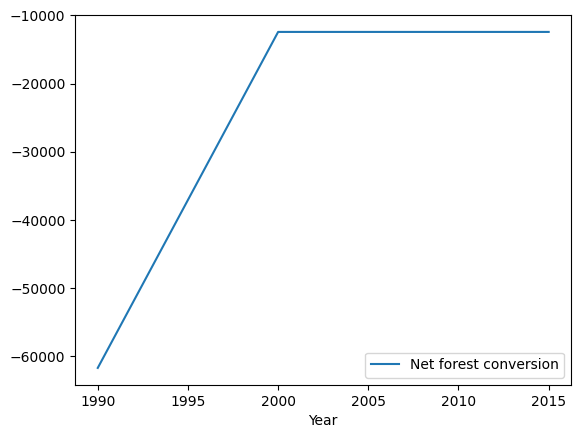

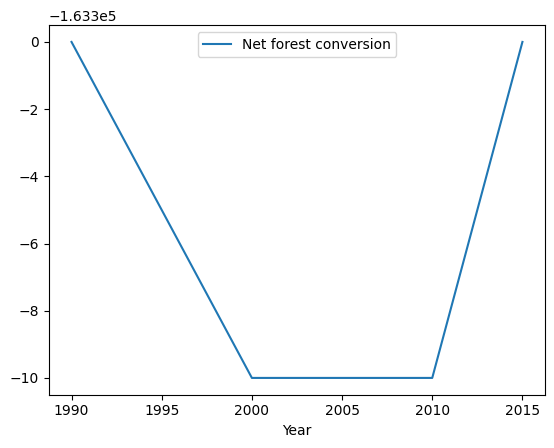

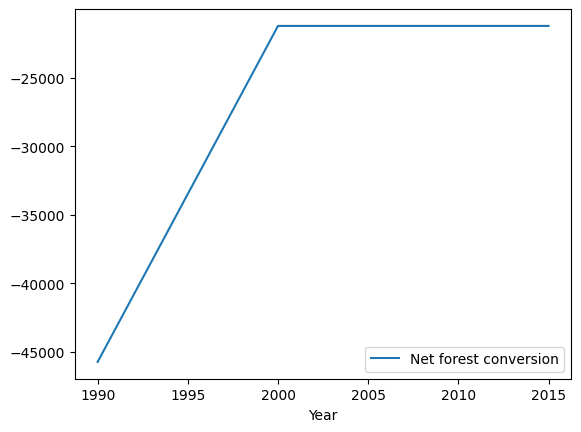

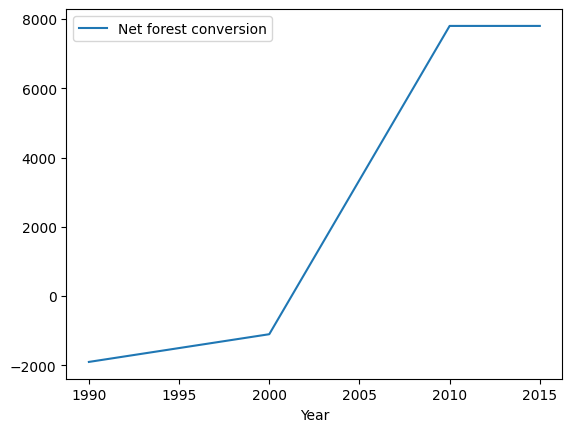

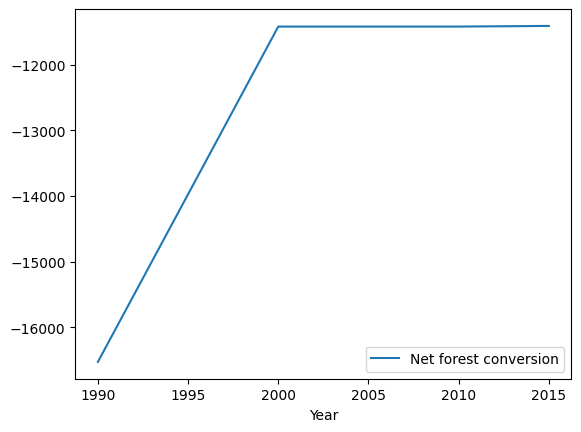

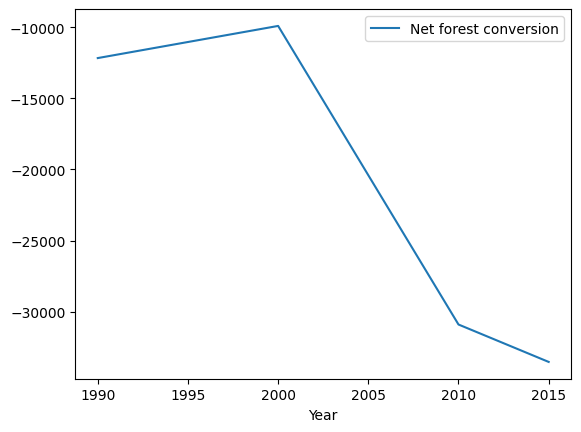

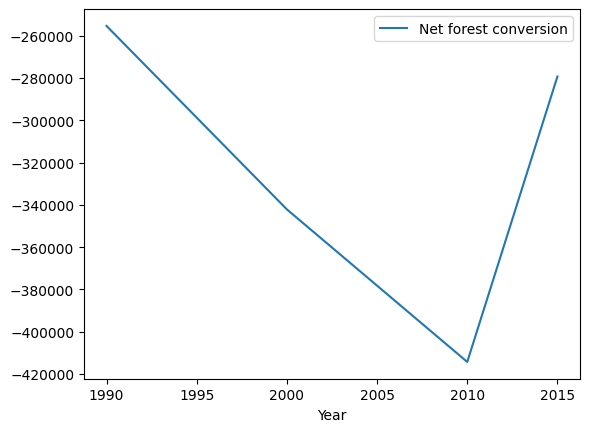

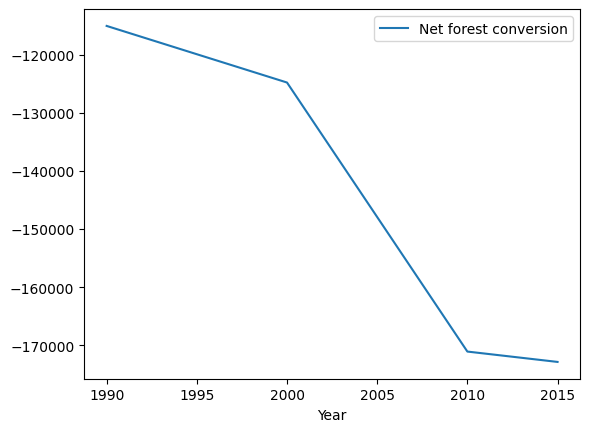

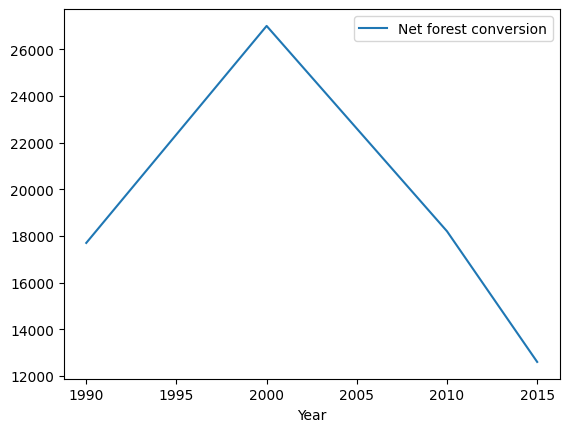

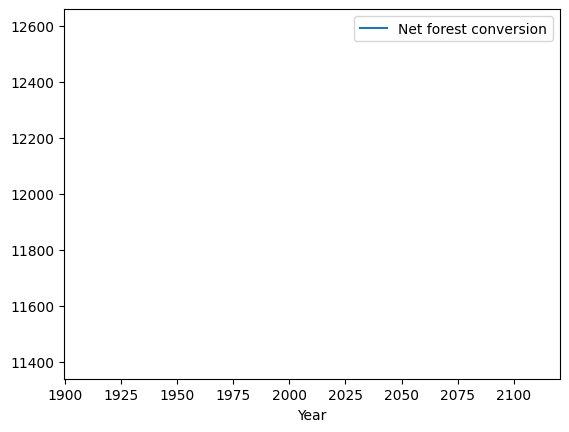

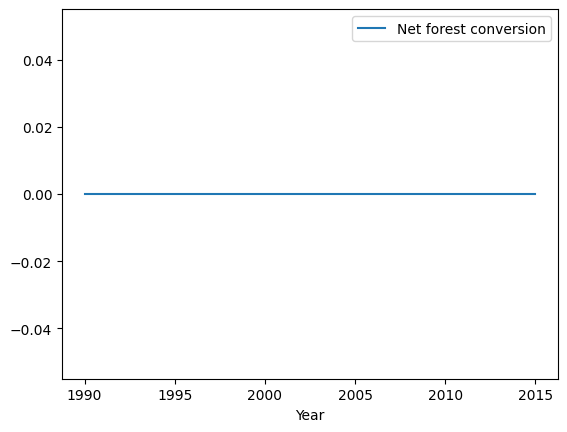

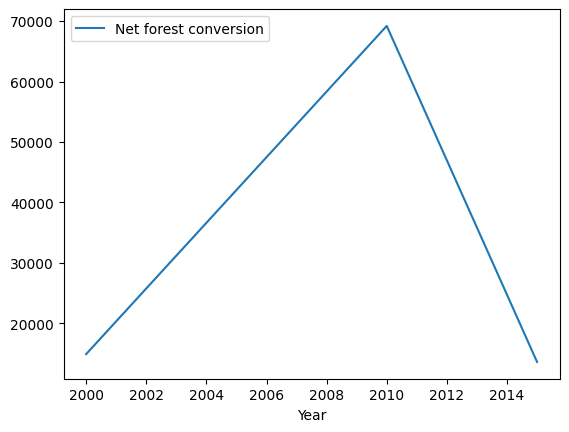

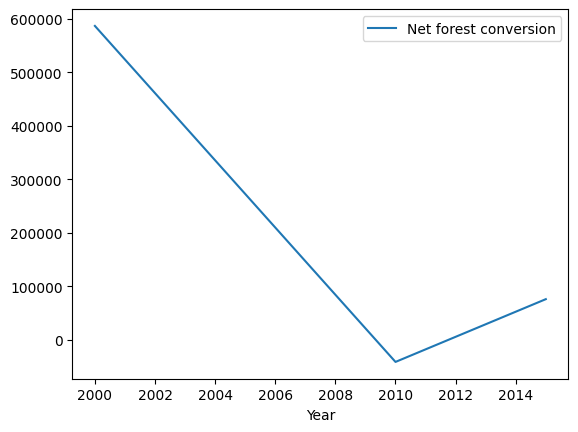

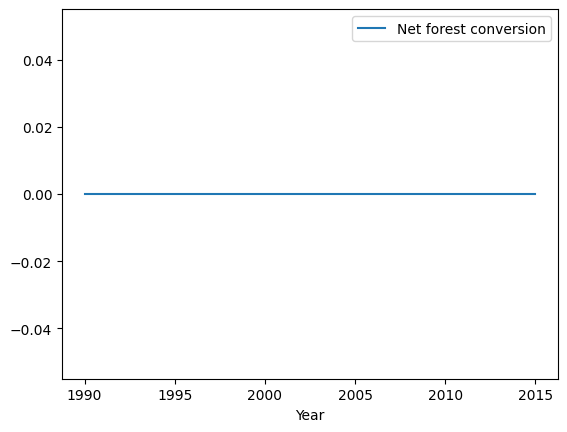

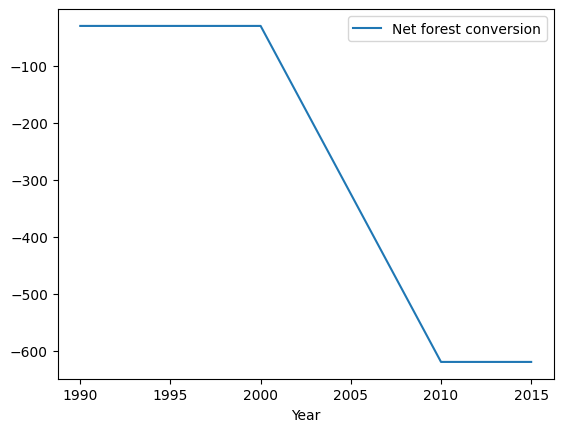

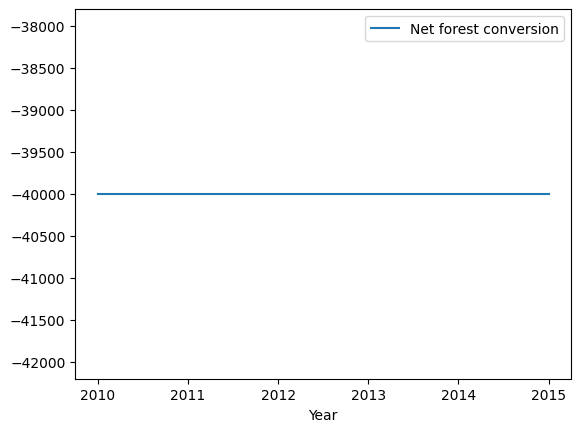

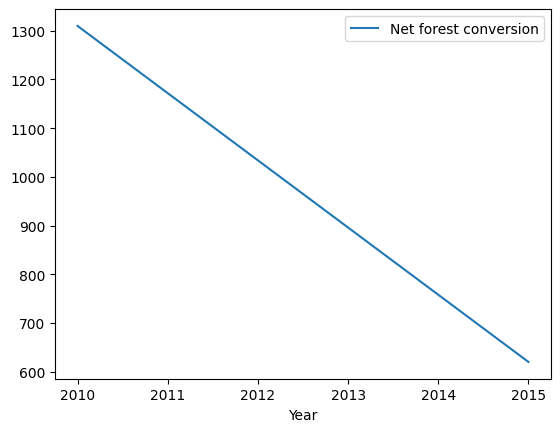

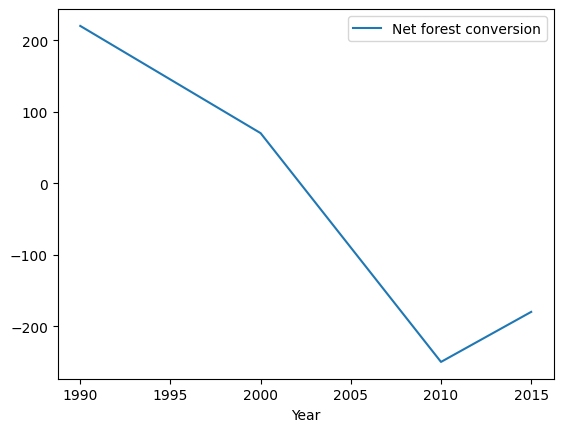

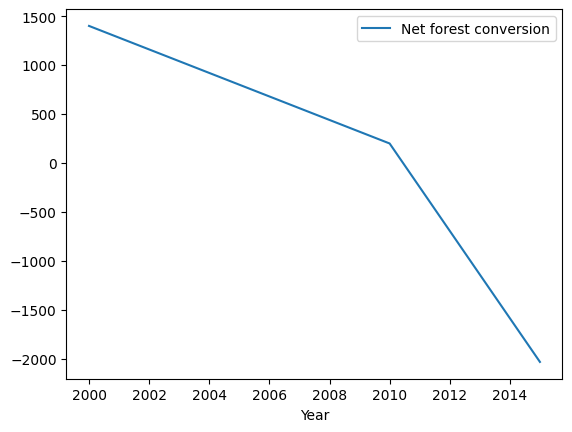

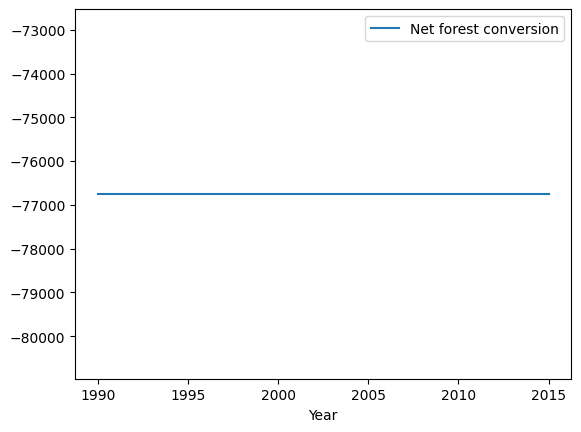

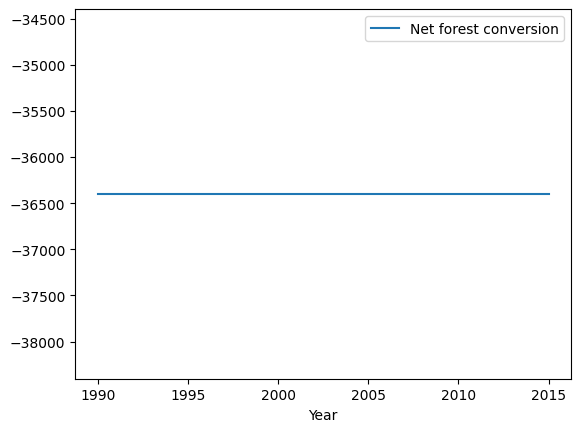

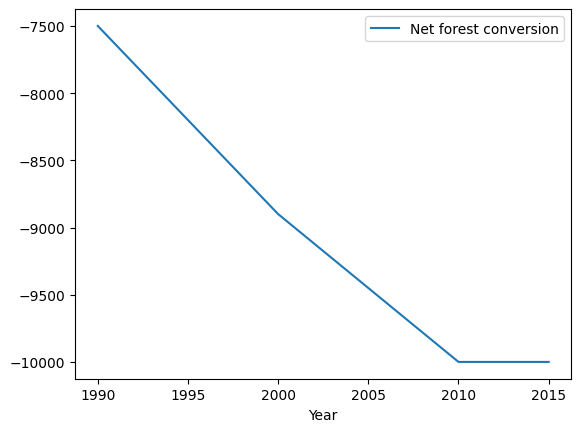

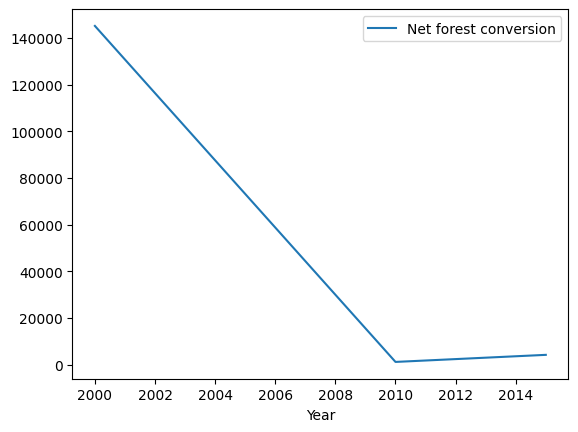

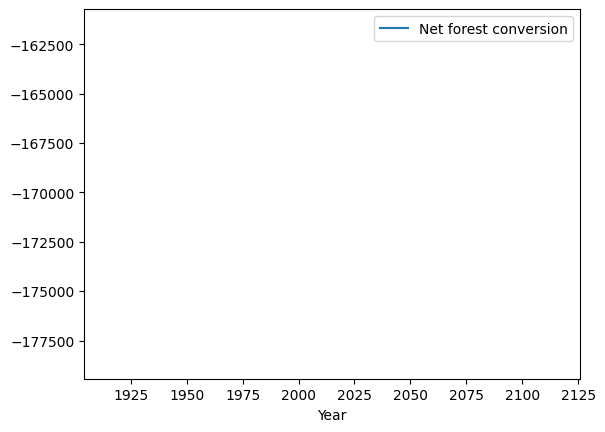

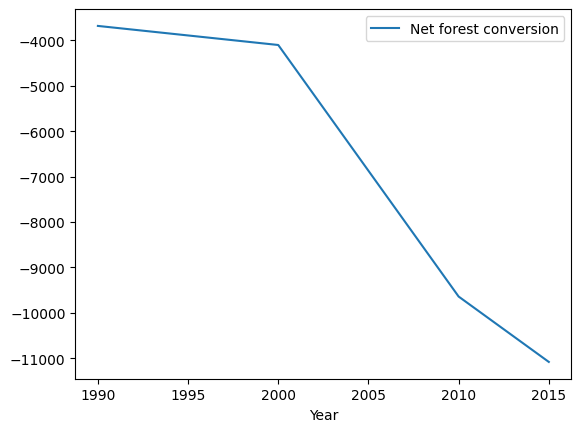

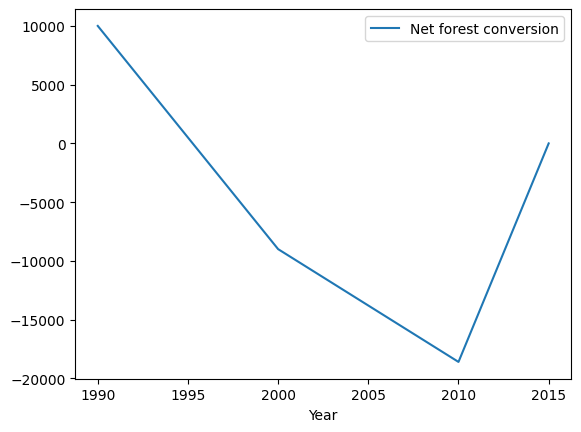

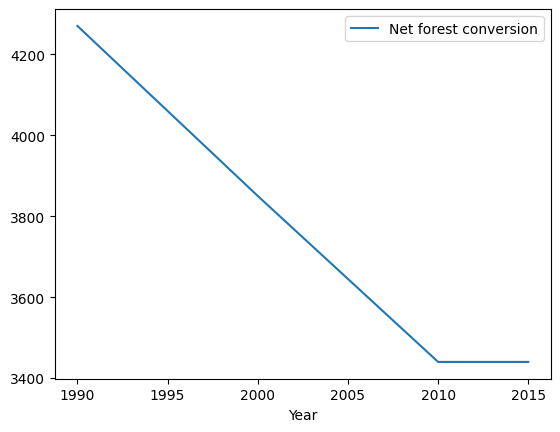

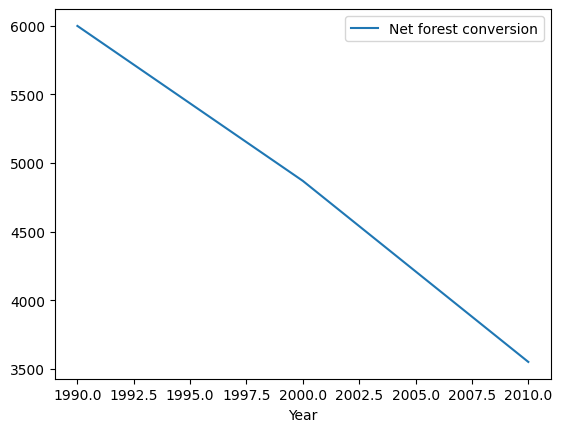

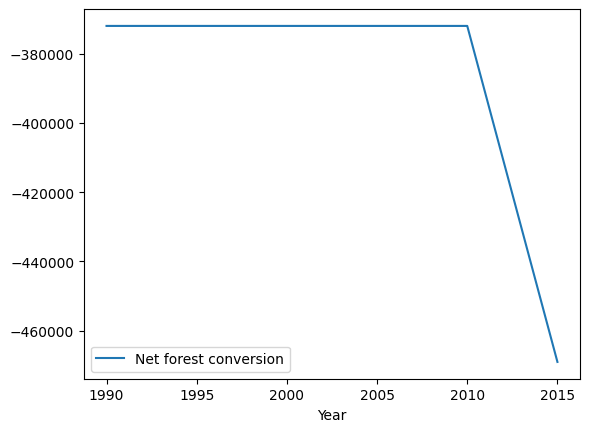

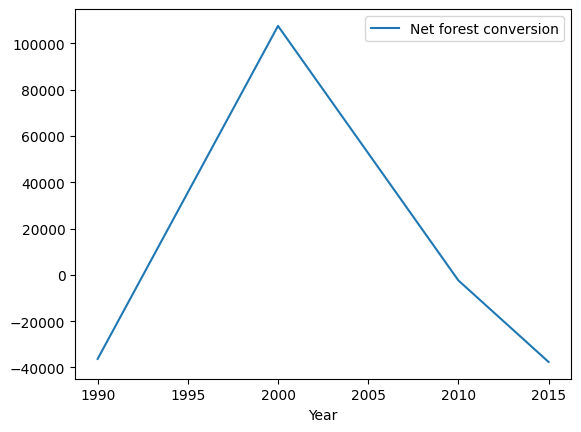

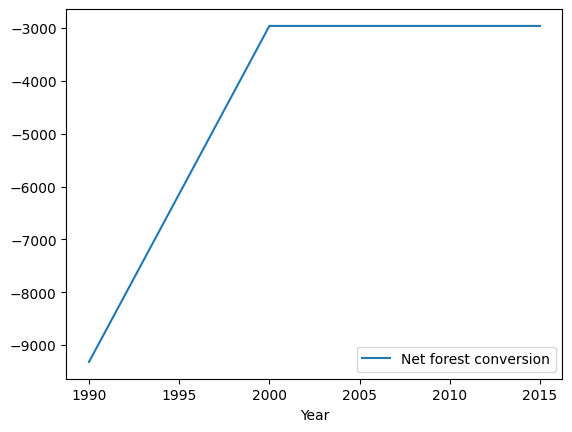

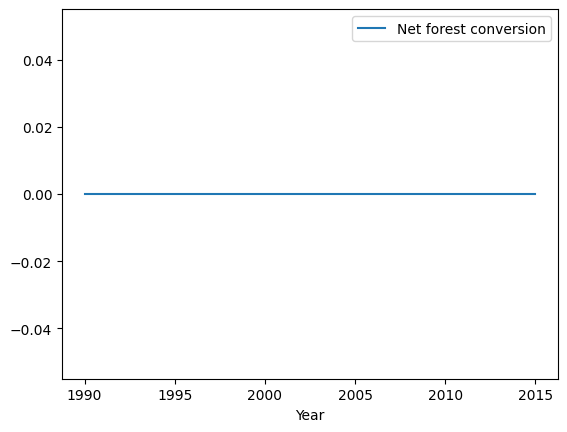

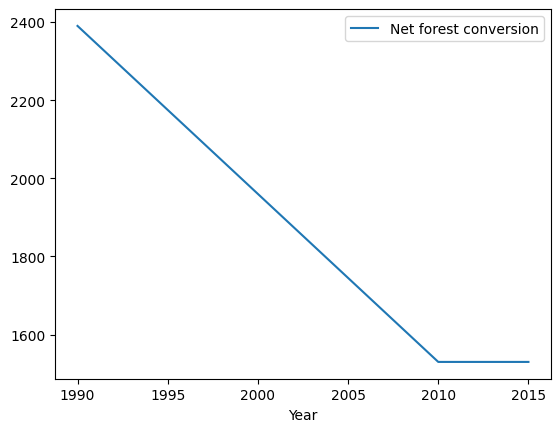

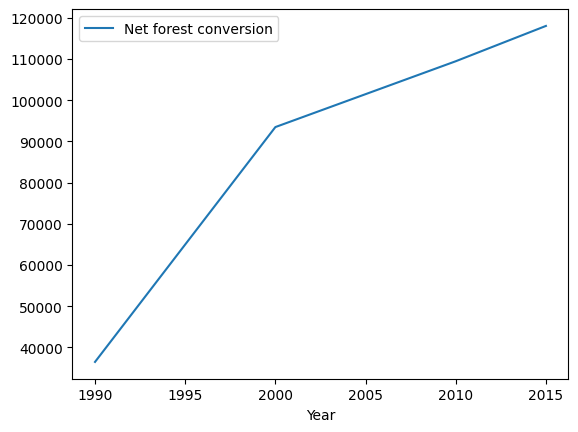

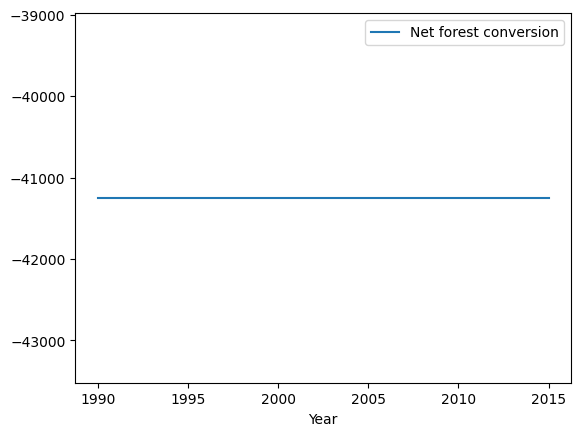

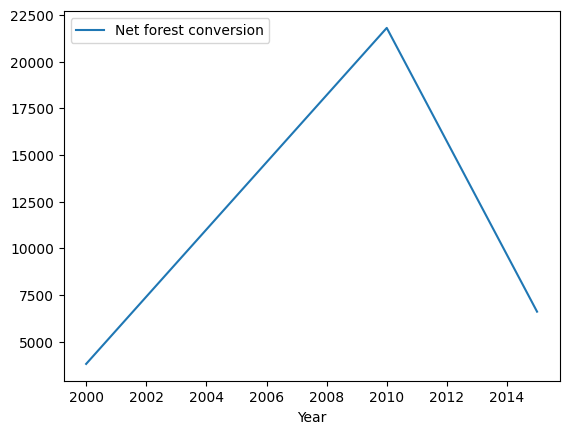

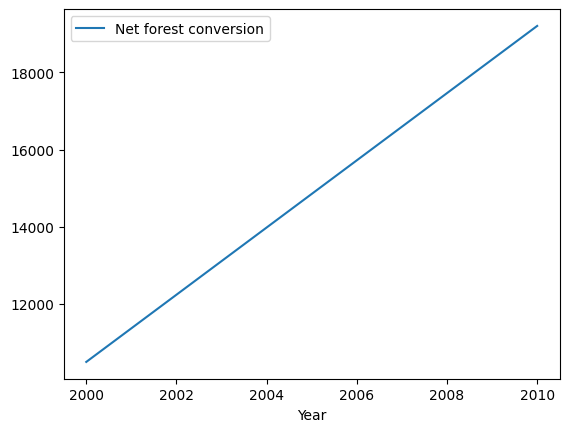

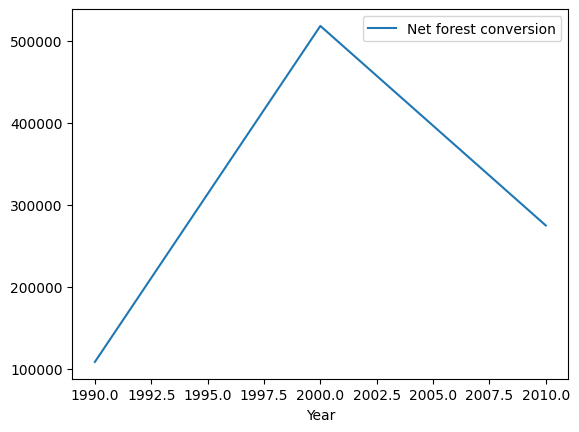

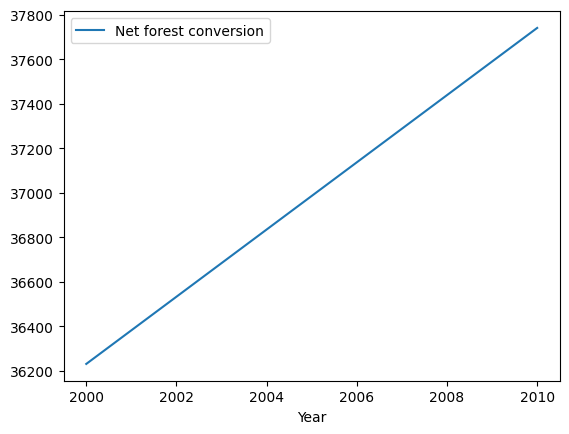

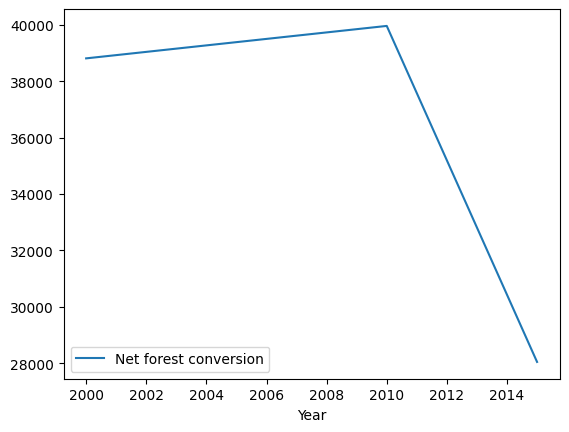

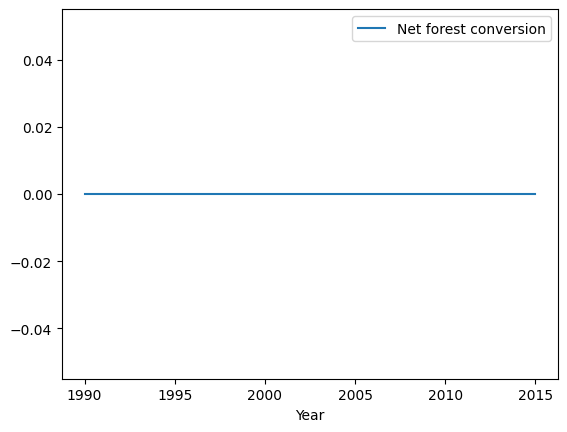

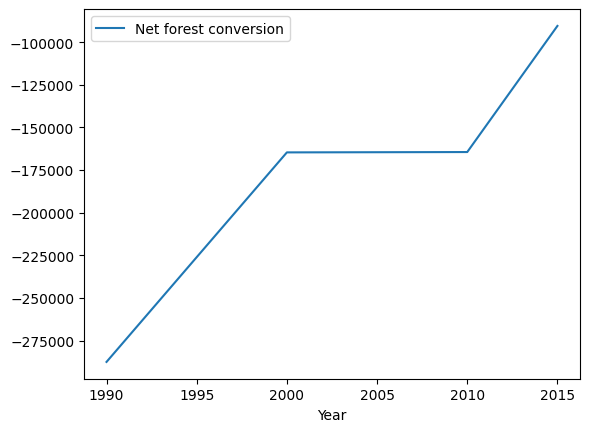

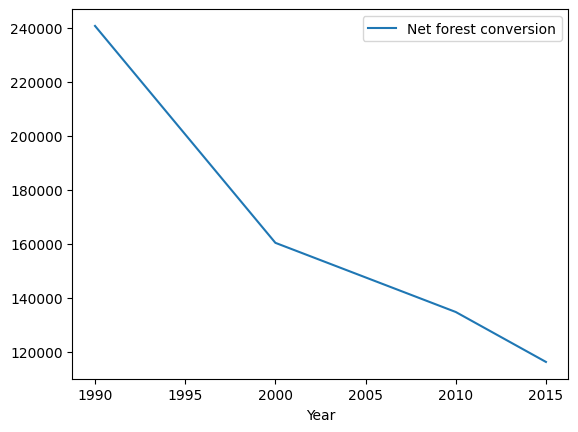

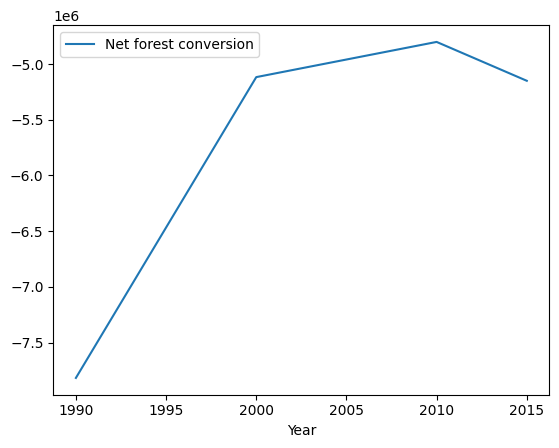

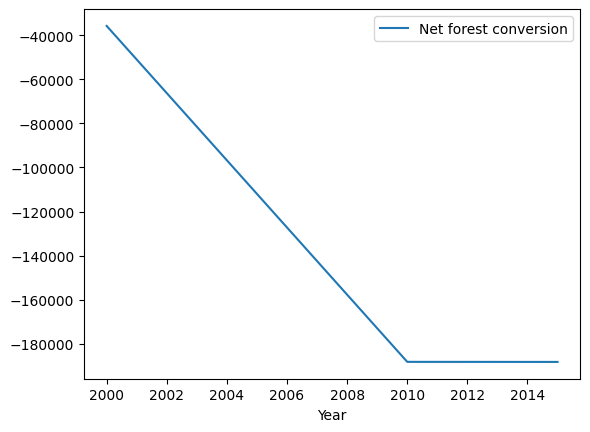

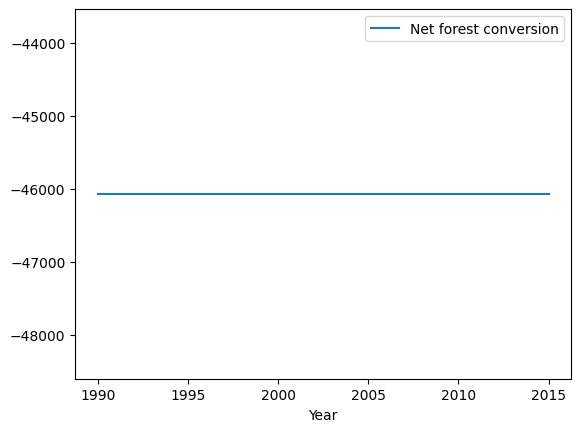

In [19]:
countryNames = df["Entity"].unique().tolist()
for name in countryNames:
    mask = df["Entity"] == name
    df[mask].plot("Year", "Net forest conversion", legend=name)

In [6]:
report = ProfileReport(df)

In [7]:
report.to_notebook_iframe()

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
sum(df["reviews per month"].isnull())

In [ ]:
df["reviews per month"].mean()

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))
ax.hist(df["reviews per month"])
ax.set_yscale('log')

In [22]:
df["reviews per month"].fillna(df["reviews per month"].mean(), inplace = True)

In [ ]:
sum(df["reviews per month"].isnull())

In [ ]:
sns.countplot(x = "room type", data = df)

In [34]:
df["neighbourhood group"].value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [ ]:
sns.countplot(y = "neighbourhood group", data = df)